![](http://www.themainewire.com/wp-content/uploads/2012/07/Screen-Shot-2012-07-25-at-10.01.08-PM.png)

# More To Come. Stay Tuned. !!
If there are any suggestions/changes you would like to see in the Kernel please let me know :). Appreciate every ounce of help!

**This notebook will always be a work in progress**. Please leave any comments about further improvements to the notebook! Any feedback or constructive criticism is greatly appreciated!. **If you like it or it helps you , you can upvote and/or leave a comment :).**

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Retrieving the Data</a>
     - <a href='#2-1'>2.1 Load libraries</a>
     - <a href='#2-2'>2.2 Read the Data</a>
- <a href='#3'>3. Glimpse of Data</a>
     - <a href='#3-1'>3.1 Overview of table</a>
     - <a href='#3-2'>3.2 Statistical overview of the Data</a>
- <a href='#4'>4. Data preparation</a>
     - <a href='#4-1'> 4.1 Check for missing data</a>
- <a href='#5'>5. Data Exploration</a>
    - <a href='#5-1'>5.1 Top States with highest number of Gun Violence</a>
    - <a href='#5-2'>5.2 Top Cities with highest number of Gun Violence</a>
    - <a href='#5-3'>5.3 Number of Guns invoved during Violence</a>
    - <a href='#5-4'>5.4 Top States where maximum people killed and injured</a>
    - <a href='#5-5'>5.5 Top Cities where maximum people killed and injured</a>
    - <a href='#5-6'>5.6 Number of people involved in the incidents</a>
    - <a href='#5-7'>5.7 Most used Guns</a>
    - <a href='#5-8'>5.8 Highest number of people killed and injured by Guns(Top Guns name)</a>
    - <a href='#5-9'>5.9 Top characteristics of Incident</a>
    - <a href='#5-10'>5.10 Top Places inside the cities with highest number of Gun Violence</a>
    - <a href='#5-11'>5.11 Time Series Analysis</a>
        - <a href='#5-11-1'>5.11.1 Week day wise Gun Violence incidents in USA</a>
        - <a href='#5-11-2'>5.11.2 Month wise Gun Violence incidents in USA</a>
        - <a href='#5-11-3'>5.11.3 Year wise Gun Violence incidents in USA</a>
        - <a href='#5-11-4'>5.11.4 Trend of Gun Violence in USA</a>
    - <a href='#6'>6. Brief Summary/Conclusions :</a>

# <a id='1'>1. Introduction</a>

Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. GVA will collect and check for accuracy, comprehensive information about gun-related violence in the U.S. and then post and disseminate it online.

For more info : http://www.gunviolencearchive.org/

# <a id='2'>2. Retrieving the Data</a>

## <a id='2-1'>2.1 Load libraries</a>

In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools

# import cufflinks and offline mode
import cufflinks as cf
cf.go_offline()

from sklearn import preprocessing
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

# Print all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from nltk.corpus import stopwords
from textblob import TextBlob
import datetime as dt
import warnings
import string
import time
# stop_words = []
stop_words = list(set(stopwords.words('english')))
warnings.filterwarnings('ignore')
punctuation = string.punctuation


## <a id='2-2'>2.2 Read the Data</a>

In [2]:
gun = pd.read_csv("../gun_violence.csv", parse_dates=["date"])

# <a id='3'>3. Glimpse of Data</a>

## <a id='3-1'>3.1 Overview of table</a>

In [3]:
print("size of data : ", gun.shape)

size of data :  (239677, 29)


In [4]:
gun.head()

incident_id       date           state city_or_county  \
0       461105 2013-01-01    Pennsylvania     Mckeesport   
1       460726 2013-01-01      California      Hawthorne   
2       478855 2013-01-01            Ohio         Lorain   
3       478925 2013-01-05        Colorado         Aurora   
4       478959 2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  congressional_district  \
0                        False                    14.0   
1                        False                    43.0   
2                        False                     9.0   
3                        False                     6.0   
4                        False                     6.0   

               gun_stolen                gun_type  \
0                     NaN                     NaN   
1                     NaN                     NaN   
2  0::Unknown||1::Unknown  0::Unknown||1::Unknown   
3                     NaN                     NaN   
4  0::Unknown||1::Unknown  0::Handgun||1::Handgun   

                            incident_characteristics  latitude  \
0  Shot - Wounded/Injured||Mass Shooting (4+ vict...   40.3467   
1  Shot - Wounded/Injured||Shot - Dead (murder, a...   33.9090   
2  Shot - Wounded/Injured||Shot - Dead (murder, a...   41.4455   
3  Shot - Dead (murder, accidental, suicide)||Off...   39.6518   
4  Shot - Wounded/Injured||Shot - Dead (murder, a...   36.1140   

  location_description  longitude  n_guns_involved  \
0                  NaN   -79.8559              NaN   
1                  NaN  -118.3330              NaN   
2          Cotton Club   -82.1377              2.0   
3                  NaN  -104.8020              NaN   
4                  NaN   -79.9569              2.0   

                                               notes  \
0  Julian Sims under investigation: Four Shot and...   
1  Four Shot; One Killed; Unidentified shooter in...   
2                                                NaN   
3                                                NaN   
4  Two firearms recovered. (Attempted) murder sui...   

                     participant_age  \
0                              0::20   
1                              0::20   
2  0::25||1::31||2::33||3::34||4::33   
3         0::29||1::33||2::56||3::33   
4         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male  

## <a id='3-2'>3.2 Statistical overview of the Data</a>

**Gun data some little info**

In [5]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
incident_id                    239677 non-null int64
date                           239677 non-null datetime64[ns]
state                          239677 non-null object
city_or_county                 239677 non-null object
address                        223180 non-null object
n_killed                       239677 non-null int64
n_injured                      239677 non-null int64
incident_url                   239677 non-null object
source_url                     239209 non-null object
incident_url_fields_missing    239677 non-null bool
congressional_district         227733 non-null float64
gun_stolen                     140179 non-null object
gun_type                       140226 non-null object
incident_characteristics       239351 non-null object
latitude                       231754 non-null float64
location_description           42089 non-null object
longitude            

**Little description of gun data for numerical features**

In [6]:
gun.describe()

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           227733.000000   
mean   5.593343e+05       0.252290       0.494007                8.001265   
std    2.931287e+05       0.521779       0.729952                8.480835   
min    9.211400e+04       0.000000       0.000000                0.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  231754.000000  231754.000000    140226.000000         200905.000000   
mean       37.546598     -89.338348         1.372442             55.447132   
std         5.130763      14.359546         4.678202             42.048117   
min        19.111400    -171.429000         1.000000              1.000000   
25%        33.903400     -94.158725         1.000000             21.000000   
50%        38.570600     -86.249600         1.000000             47.000000   
75%        41.437375     -80.048625         1.000000             84.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count           207342.00000  
mean                20.47711  
std                 14.20456  
min                  1.00000  
25%                  9.00000  
50%                 19.00000  
75%                 30.00000  
max                 94.00000

**Little description of gun data for categoricals features**

In [7]:
gun.describe(include=["O"])

state city_or_county                  address  \
count     239677         239677                   223180   
unique        51          12898                   198037   
top     Illinois        Chicago  2375 International Pkwy   
freq       17556          10814                      160   

                                             incident_url  \
count                                              239677   
unique                                             239677   
top     http://www.gunviolencearchive.org/incident/106664   
freq                                                    1   

                 source_url  gun_stolen    gun_type incident_characteristics  \
count                239209      140179      140226                   239351   
unique               213989         349        2502                    18126   
top     http://blog.tsa.gov  0::Unknown  0::Unknown   Shot - Wounded/Injured   
freq                   1092      121310       93559                    47541   

       location_description     notes participant_age participant_age_group  \
count                 42089    158660          147379                197558   
unique                27595    136652           18951                   898   
top                  Austin  man shot           0::24          0::Adult 18+   
freq                    240       501            3814                 94671   

       participant_gender participant_name  \
count              203315           117424   
unique                873           113488   
top               0::Male       0::Officer   
freq                93496              144   

                         participant_relationship participant_status  \
count                                       15774             212051   
unique                                        284               2150   
top     1::Significant others - current or former         0::Injured   
freq                                         2651              42293   

       participant_type              sources  
count            214814               239068  
unique              259               217280  
top           0::Victim  http://blog.tsa.gov  
freq              58564                 1092

# <a id='4'>4. Data preparation</a>

## <a id='4-1'>4.1 Check for missing data</a>

In [8]:
# checking missing data
total = gun.isnull().sum().sort_values(ascending = False)
percent = (gun.isnull().sum()/gun.isnull().count()*100).sort_values(ascending = False)
missing_gun_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_gun_data.head(20)

Total    Percent
participant_relationship  223903  93.418643
location_description      197588  82.439283
participant_name          122253  51.007397
gun_stolen                 99498  41.513370
gun_type                   99451  41.493760
n_guns_involved            99451  41.493760
participant_age            92298  38.509327
notes                      81017  33.802576
participant_age_group      42119  17.573234
state_house_district       38772  16.176771
participant_gender         36362  15.171251
state_senate_district      32335  13.491073
participant_status         27626  11.526346
participant_type           24863  10.373544
address                    16497   6.883013
congressional_district     11944   4.983373
latitude                    7923   3.305699
longitude                   7923   3.305699
sources                      609   0.254092
source_url                   468   0.195263

# <a id='5'>5. Data Exploration</a>

## <a id='5-1'>5.1 Top States with highest number of Gun Violence</a>

In [9]:
temp = gun["state"].value_counts().head(30)
temp.iplot(kind='bar', xTitle = 'State name', yTitle = "# of incidents", title = 'Top States with highest number of Gun Violence')

* **Top 5 states with highest number of Gun Violence in USA :**
  * Illinois - Approx. 18K
  * California - Approx. 16K
  * Florida - Approx. 15K
  * Texas - Approx. 14K
  * Ohio - Approx. 10K

## <a id='5-2'>5.2 Top Cities with highest number of Gun Violence</a>

In [10]:
temp = gun["city_or_county"].value_counts().head(20)
temp.iplot(kind='bar', xTitle = 'City name', yTitle = "# of incidents", title = 'Top Cities with highest number of Gun Violence')

* **Top 5 Cities with highest number of Gun Violence in USA :**
  * Chicago - Approx. 11K
  * Baltimore -  3943
  * Washington - 3279 
  * New Orleans - 3071
  * Philadelphia  - 2963

## <a id='5-3'>5.3 Number of Guns invoved during Violence</a>

In [11]:
temp1 = gun['n_guns_involved'].dropna().apply(lambda x : "4+" if x>4 else str(x))
temp = temp1.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.iplot(kind='pie',labels='labels',values='values', title='Number of guns involved during Violence')

* **Number of Guns involved during Violence :**
  * 91 % time only 1 Gun was involved.
  * 5.33 % time only 2 Guns were involved.
  * 1.65 % time more than 4 Guns were involved.
  * 1.44 % time only 3 Guns were involved.
  * 0.62 % time only 4 Guns were involved.

## <a id='5-4'>5.4 Top States where maximum people killed and injured</a>

In [12]:
temp1 = gun[['state', 'n_killed']].groupby(['state'], 
                                   as_index=False).sum().sort_values(by='n_killed', ascending=False).head(20)
temp2 = gun[['state', 'n_injured']].groupby(['state'], 
                                   as_index=False).sum().sort_values(by='n_injured', ascending=False).head(20)
# temp1 = gun[['state', 'n_killed']].reset_index(drop=True).groupby('state').sum()
# temp2 = gun[['state', 'n_injured']].reset_index(drop=True).groupby('state').sum()
trace1 = go.Bar(
    x=temp1.state,
    y=temp1.n_killed,
    name = 'State name with # of people killed'
)
trace2 = go.Bar(
    x=temp2.state,
    y=temp2.n_injured,
    name = 'State name with # of people injured'
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Top States where maximum people killed', 'Top States where maximum people injured'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout']['xaxis1'].update(title='State Name')
fig['layout']['xaxis2'].update(title='State Name')

fig['layout']['yaxis1'].update(title='# of people killed')
fig['layout']['yaxis2'].update(title='# of people injured')
                          
fig['layout'].update(height=500, width=1100, title='Top States where maximum people killed and injured')
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* **Top 5 States where highest number of people killed and injured :**
  * **Killed :**
    * California - 5562
    * Texas - 5042
    * Florida - 3909
    * Illnois - 3409
    * Ohio - 2508
  * **Injured :**
    * Illnois - Approx. 14K
    * California - 7644
    * Florida - 7072
    * Texas - 6106 
    * Ohio - 5703

## <a id='5-5'>5.5 Top Cities where maximum people killed and injured</a>

In [13]:
temp1 = gun[['city_or_county', 'n_killed']].groupby(['city_or_county'], 
                                   as_index=False).sum().sort_values(by='n_killed', ascending=False).head(20)
temp2 = gun[['city_or_county', 'n_injured']].groupby(['city_or_county'], 
                                   as_index=False).sum().sort_values(by='n_injured', ascending=False).head(20)
# temp1 = gun[['state', 'n_killed']].reset_index(drop=True).groupby('state').sum()
# temp2 = gun[['state', 'n_injured']].reset_index(drop=True).groupby('state').sum()
trace1 = go.Bar(
    x=temp1.city_or_county,
    y=temp1.n_killed,
    name = 'City name with # of people killed'
)
trace2 = go.Bar(
    x=temp2.city_or_county,
    y=temp2.n_injured,
    name = 'City name with # of people injured'
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Top Cities where maximum people killed', 'Top Cities where maximum people injured'))
                                                          

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
                          
fig['layout']['xaxis1'].update(title='City Name')
fig['layout']['xaxis2'].update(title='City Name')

fig['layout']['yaxis1'].update(title='# of people killed')
fig['layout']['yaxis2'].update(title='# of people injured')
                          
fig['layout'].update(height=500, width=1100, title='Top Cities where maximum people killed and injured')
iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



* **Top 5 Cities where highest number of people killed and injured :**
  * **Killed :**
    * Chicago - 2104
    * Houston - 1145
    * Baltimore - 1055
    * Saint Louis - 919
    * philadelphia - 901
  * **Injured :**
    * Chicago - Approx. 10K
    * Baltmore - 2427
    * Philadelphia - 2326
    * New Orleans - 1892
    * Saint Louis - 1783

## <a id='5-6'>5.6 Number of people involved in the incidents</a>

In [14]:
def extract(a):
    a = a.split('||')
    a  = [x.replace('::','-') for x in a]
    a =  [(x.split('-')) for x in a]
    y = []
    for  i in range (0, len(a)):
        y.append(a[i][-1])
    return(y)  
gun['participant_gender'] = gun['participant_gender'].fillna("0::Zero")
gun['gender'] = gun['participant_gender'].apply(lambda x: extract(x))
gun['Males'] = gun['gender'].apply(lambda x: x.count('Male'))
gun['Females'] = gun['gender'].apply(lambda x: x.count('Female'))
gun['people count'] = gun['Males'] + gun['Females']
gun[['state','people count', 'Males', 'Females']].groupby('state').sum().iplot(kind='bar')

* Every Incident having More number of Males involved compared to Females.

## <a id='5-7'>5.7 Most used Guns</a>

In [15]:
#https://www.kaggle.com/shivamb/stop-gun-violence-updated-exploration
gun['gun_type_parsed'] = gun['gun_type'].fillna('0:Unknown')
gt = gun.groupby(by=['gun_type_parsed']).agg({'n_killed': 'sum', 'n_injured' : 'sum', 'state' : 'count'}).reset_index().rename(columns={'state':'count'})

results = {}
for i, each in gt.iterrows():
    wrds = each['gun_type_parsed'].split("||")
    for wrd in wrds:
        if "Unknown" in wrd:
            continue
        wrd = wrd.replace("::",":").replace("|1","")
        gtype = wrd.split(":")[1]
        if gtype not in results: 
            results[gtype] = {'killed' : 0, 'injured' : 0, 'used' : 0}
        results[gtype]['killed'] += each['n_killed']
        results[gtype]['injured'] +=  each['n_injured']
        results[gtype]['used'] +=  each['count']

gun_names = list(results.keys())
used = [each['used'] for each in list(results.values())]
killed = [each['killed'] for each in list(results.values())]
injured = [each['injured'] for each in list(results.values())]
danger = []
for i, x in enumerate(used):
    danger.append((killed[i] + injured[i]) / x)

In [16]:
df = pd.DataFrame({'Gun name' : gun_names, 'Used': used})
df.groupby('Gun name').sum().sort_values(by='Used', ascending=False).head(20).iplot(kind='bar', xTitle = "Gun Name", yTitle = "Count", title = "Most used Guns")
#df.iplot(kind='bar', title='Number of guns involved during Violence')

* **Top 5 Guns used during Violence :**
  * Handgun -Approx. 25K times
  * 9mm - 6459 times
  * Rifle - 5270 times
  * Shotgun - 4270 times
  * 22 LR - 3355 times

In [17]:
df = pd.DataFrame({'Gun name' : gun_names, 'danger': danger})
df.groupby('Gun name').sum().sort_values(by='danger', ascending=False).head(20).iplot(kind='bar', xTitle = "Gun Name", yTitle = "Count", title  ="Highest number of people killed and injured by Guns(Top Guns name with total infected people)")

## <a id='5-8'>5.8 Highest number of people killed and injured by Guns(Top Guns name)</a>

In [18]:
df = pd.DataFrame({'Gun name' : gun_names, 'People killed': killed, 'People injured': injured})
df.groupby('Gun name').sum().iplot(kind='bar', xTitle = "Gun Name", yTitle = "Count", title  ="Highest number of people killed and injured by Guns(Top Guns name)")

* **Top 5 Guns who killed and injured highest number of peolpe :**
  * **Killed :**
    * Handgun - 3304 people killed
    * 9mm - 842 people killed
    * Rifle - 672 people killed
    * Shotgun - 660 people killed
    * 22 LR - 385 people killed
  * **Injured :**
    * Handgun - 5700 people injured
    * 9mm - 1240 people injured
    * Shotgun - 965 people injured
    * Rifle - 882 people injured
    * 40 SW - 702 people injured
    

## <a id='5-9'>5.9 Top characteristics of Incident</a>

In [19]:
buddha = b'/9j/4AAQSkZJRgABAQEBLAEsAAD/2wBDAAUDBAQEAwUEBAQFBQUGBwwIBwcHBw8LCwkMEQ8SEhEPERETFhwXExQaFRERGCEYGh0dHx8fExciJCIeJBweHx7/wgALCAHAAcIBAREA/8QAHAABAAEFAQEAAAAAAAAAAAAAAAcDBAUGCAIB/9oACAEBAAAAAZj9AAAAIL0zqb6AAAB8ffn0AAAI7hbJ32F3qbAAAA+fR59AAAGoQhrXRN9z9YzvIgAAB59A+fQAAHMOopAsddx9Xry7AAA8+gHx9AADTOf8Nu3vZ9c0K6myVgAAfPoA8/foAA5Y1q8m7aLjGQDhqnWuTAAHj2AD4+gAHI2M+zPv+HpwDZOq9hAAPPoAB8fQAHLmrJo17X5cgKj66+vAAHn0AAPj6ABzxHQDNdVXAAHn0AAD4+gBYchADoqQgAfPoAAD4+gByHjwDqfZQA+fQAAB8fQBy9qgD11/dgDz6AAAB8fQDnqOcnixUvvXXAA+fQAAADz6AQ1F8zQEJM8YrpgB8fQAAAA8+gNHhfp7mbTl71dEn2awPnz0AAAAB8+gpQRPnOser7r6Id82IHx9AAAAAPHsFCvy1rNxQ65uq4Pj6AAAAAHn1Tw2HxWG0zVZwykM0N9zmWy2bufj6AAAAAClDEVWgXnSONiHUgqb9O2UAAAAAAheHLm38ird29WyC48bb0x6AAAAACx5LtV1b+QAuaVN0pvAAAAAAR1zwLqh4ALmj4JUngAAAAAIRiEPfg9XNoffvkbV1EAAAAAHO8dlzbDYpYyEdR0Lm2Mj12AAAAAHNOkm9aR49+JAl+npUMnrfdAKnY/2lVAAAABRseedNJwiawusbtG667fxv9XczwZ78/OxqmBz3z6AAAAx1pfYeEdZpOg4AW99R++ftWjW8TrB9tTqdO1fGQt8sAAAA13K1cfC+lWXrpKFdZ8/c/X2fXNU++vHVnMePX3VtXAUNl+gAAAKOO8/Yij+199MxDo1G4lPda2uQ5bUst0dzdjPGd6OW+QtcwAAAAwvzJU4jir46yjOGPrf5Qx2KhXz63HoLm3XWe6WuPlajWAAAABCsOrrsLRebSSMRiJEiEl6bucNCbf06AAAAAEJRAzvV+G5Qpnu4tB0FJUBxe2zqAAAAAAIBjFuvS/jkKz9yxR2zRtVwLqLaYdhZnOsAAAAAA5g1JKU8euX9T2Gcr+v6gnSvfX9zHPPSp17dgAAAAGM5LpVZ1lJz1HGbnq8x+UhHSMr1u17l22dEyGAAAAAowzD9b709s/zlbXa3Ukf6pPPNet1Os8r45Jtbbc+jrsAAAANQiTRrasyvV/qOeeVe5x65q2KVZ3QBGle2qbZKUjVAAAAWkGxl5V/lGdpW13mXHjJ5XVx66BknWeX6dxam39AZ0AAAYfnPVyv8oylO2r864lm98jKfNt5T3q20dXnWUIygelcW3xkeh90AAAa3zjhS48ZecN4iKH6BW6yxVTN6NIXLesCR5usYL064tvi4n+RQAAaNz5jy4yktSHHMSYcXEs7Zk/Nf5aahGODF3KEra5DuvW3lUmiX/oAeLS+s4eiWkbTKuRjyPrQCTp3+6dS2+8i6CaYKm7STcRtoHg32dM3beq4Nb591rYbHFqu+bfiI7xQAShLeuavKGjQZTAF1v20YOObFcbDrd5PMhCBddkyB6bMyZfaDp1MAGy9RYHnXF9AyBA8VgAbHIt1G+qky65a9A5NzptVxBiWJIg3WqPgADM3uueDN3WtAALnIzdTgGjIcnwf07e4yJofqU9uk6Cvdv5AAAAAAuaUn3ESKm2dFV4I1/Xbe9kiLLi38gAAAAAFx43rCa3WzuU3+VlLX9XgWrb+QAAAAAAuKcpylk8gClyhY2/kAAGY23N+8Vq+t+QAAXHzqDZQMPyta/AABlpJkbZvoYiPIz1kAAK8+yQBT5X18AB73WUt9qgBqUWR3bgAK3Vea+h59aNzjSADIyRKWwgADHRlGOvgAmOafj6fPpHcH4cDN7tvu8VgAAHzVI/0fWvALqW5jqPj78+hS1HXcf6v81smWAAAAFlrWDxlO6zu5XgfPoAA1O2ZLC5O1oXtvcWeXt6N1sGP1z559XPrG1d9AAAAAt/nz7S++qVen68VKVX1cW1G4ofPdP39vAAB/8QAMRAAAQQCAAQFAwQCAgMAAAAABAECAwUABhAREhMHFCBAUBUwMyEjMTQWIjI2JCVD/9oACAEBAAEFAvd75azqfQ2pFYb7vl7rcLySrZLcWsj5qe1nntdaLgtCj7YUrVdkLed8lc7ABVybPax2x0Cxtmqngy1kRTJIbt1e4+vnQY8Dba0mX5HbYnxbDwI2af6bRX5lS0+WOczGtV7hGOjF+P2W9iqIrWxJsyMr9eKsKzW6Zxl1vdRDAwHWDphsHlfBNrW0ebm9l/PvdkIcTe4NC8ifVq+4qGzTRoSa6KQq7bZn11pXFVs2NVWrVzqVW+w/n31oits+GrbGZNh3fcLQEOLg2C8Lq4C55Sp+Gtp00Px21w9jYeGsWlLU1Gy7K+yjobgioJfsVFYhSJ0v4BRdgP47e3DTWn2KZsTrWGWKeP42wjWYD7WgRqzX/jrCLsH/AGdXi7Ov/HbbF2di+yJH2RfjvEGLovcsQ5QC/Q1FctiLKCXVRd+z+P8AEqH9KeLv2u+VXmQ/RotX5o7xDi6LvS4e9sXx+7C+Z1/UG9exr+qbcBDXXHAOLvlgCwhCeJTf3/DcXnL8fI1sjKGukA3bN/dz2DgC7oNzxHjc9uugfTan5DoZ3M2cphl7k8UkMifoteSwwJ7GP+Oe5rGy3FXFku0UjMk3Orbk+7ty02WzPjHhmnlbVVj5risAPs9kgfHY1NwfWYPu8qJFutcuRbXSvyG9qJchnhmT4d7msZebXJK8iaeeT0izSjz94qKo1k/z4W0EWE1p6Wuc11NstgFlcaOeL8Lv1svXn/NFTkvoY5WPKLKKWGWSF5RM5Unpa1ERzlcurWzquwT4Q2dgohMzyJ+CKj0VFRfttRGo5VcvDSjfOUnwe/k9mj9HNHI5FRfsoiNRyq5ePhyT0WPwfiTNzJ9PNV9JEMw8voVefp1Obs7D8H4gv6r/AIpE5YPRr3lFtma0MBd7LTMt7DcBK6u9McTpGca1/asfg93XnsvEEXuae1FdwRqqmaraghu5ByDByxlx7Nb1MUHooQVfT8W/o5ODpGM9/N+kQL3PTdP+y8dYG7ulRu5EwtR0zXq7hrjq+Kz2DbEIG1nYJKnNtOqrSNUVMRqrioqZGqsh1OHr1HkvPodioqYn8tX/AFyy/LnNPdkEJGvmpkzr7gg0j2Jtr3fXmRtRyr1QQ/pHp6u/xidskJ6KRkXc6+h74ke9Vc6ZmdpHPR8jl/8AmizPSNJeorqVNaGnbQEftLymXCf+UX+kccEsjYO/HNZflKm7TRIl92/9oxpMLsl5eXrP43pOVxB/Wb/Xi/r6g3p1+/j7W0DOcs8OQKvKqrXnBVdd3rDZ6uMcSOjLSoh/2Yjla1qMfiJ+xVRpFXWULmzlfl5Rtj7ad6H8WWX5mO5ke7c1j8KgibEMqqFWfx4gt5WY/wDWiTqia1Wj62nTS7qzs30UfRLHya+KJeWq1xte8omBkhz43yWIVna1pgLgyE6kx3JxFZH5iwEIa2O/6o7xWRoknJ2Bp3LGEqNI2EuknsvykwpIwOb3bxpOpBJHZ2kSEWFYc8Q0ahSvRjP2nZyZgcLYBvEWFnl1cxIutj8WRrWasabLMWMsAmuEfUgtnOtasVJebf2M7iNTRIu7sKjRKu3t6dj7jVb3eWarzdsCjRKrGNZj42PXFjjV3vvEv8nAVndJzeoe7rvHXL4SnAvb8y1SqsSqwkjbBjq/j4bQ8yM3xnRsXDTv+yfB+JS/v8NfZ3LzLuHv1DuSLx/nCIZh5PR4fQpHT54jM5W/DUV6dj+D8RpOq44aTH3NkxU54XF2C8TlzO1DrH0ar67TfQGT1dLqhZsd6OOHacNUh7OvZ4lR/wCvChk7V18Hts/mNh4eHMXO04bdF2diyrqDrJKNLWvrnTQ+ZsFilIkLMeyyoLcduInNRYkgGzxBiWSi4NVWuDmQgX4G0KaFXvcr3YxvVnh3CiAcPEFG/XsqbAisLrNlANbYKs8NXN5jDLsMKPZb6W2flSjVtOGxw9+jciOThoRnmKX4CR7I275bxTx4xvVj3c81YbylDw2MxD7nImOlkpa0apC3DYoXD6jdpVT/APh2Qew1/wBMtcaqtWqLadXYqI5DoXBWCojkzUrL6bbQEjkJ7242CvrcstssyVmmmnfjG88e7nlIGp9on6cN2tkCA4RPdFIQYWRxhmmgcSSQS7holsgxHDxBC7NoiqiqiPTGqrVr9jtg1qNtCKVqo5vuCZ4hodg2qcr0Mbzx7ufDQKxYR8vbSCqDOJmNK9FeHOcXfUxNRJ6dQvkPizZK76pVva5j0Xkqoknoo74yrdU2YlmP7a0sBq4W9uSbafixuPd1cNY1iQpWojW312LVRWZxFiVwpYICrSy0wmJJ4ZYJdFrmi1luDHY18rHRy1Oq2BibTVC1EnCN7o36zs8ZfDa9cQ5Zo3xSJ+mfk9AJZAROuX0FtH7S7thaoa1sCbIri1v6Pd1ZV1ZtlJRayJX5PLHDFe7fksj5ZOMb3RyVZbDgL+mHthtem660maMeGgp4/NZsx31C59FDtBIKV1gJYQ3NMFaMutePreH5PRDJJDLq+xx2Key2PYB6tppU5hHFrU5AgG2UtPp8EOSyB141ruUEeWNiZYSeiJqPkH0rrYBQlV8XmLQPHPiZY2bfNnPsCCXTVtoVFLo7MuAfpxvoHnmHlqdymjyutALBtxq9edltRWNZn5PQiq1dZ2lHfdcqNSIsSV2Ezwjw3+3OkRyq53GppD7DK/VAh0K2Olro7HcLCfCJ5iJPXqmx+RyGWOaN8kcaWY/Qxn/sCYHDombPs0Y7HKrl9TVVq120WoeV+310+G0NNbstdZsRcVFReOv7IVW5V2YdlFk08EKQyxTN9VzcBVcV1cm2smCXVqKhpxZsnBjXPfWapZl55XWaJLDcyHYceaa77epU1iQkNNWx5tLgaqt0wsc2aWprJG7HQGOFVFav2oJ5h5K7brIfFP1q8yy08hiEjziy8IZZIZJdguZI5HukeEYSFNr2zDWCei9v76MkGitrKaDU6oUV3Lq4AVpx7q3TOWT3FDSNsr+yNRyq5fua4B9Rt2NRjba4BrGXdnPamjzSQT0GyiHszxArmwF/drbQ0JRdoDMYVqtcdFZ0NnX+jXaCqs6O21WwEWuu7sCSukJlD4bqWGZZ6xtDVbv1okY3DUdcaUy2twKaC6vj7NURGo5Vcv3ayxKrZCb23IRVVV4h2liIh91Yni/eRUcleeZWz0G0DH5sutwGxvarHZpNn5Gy2LYR6xohjJLgSdpQuMODfLvFIrX4q8+Gr1f1Sy2XZIwEmkkmkREYiqqr8K1UcjkVq6zs7xV3qsbxVVVdZp5LUyUgMNjJoXttNSsoZeV8C3ty8BR5SpzzWa/W4nKPFXmvw7XIqOarV1u5aOy8rJasvEY9yDPuFgD1q5LczUWIzg5rXNGo6oeTYjAtfGcqud+P4trk5OarV1C0hmbLS1Uo4Yg4cHqkc1jLUySwsPx+0DrTzMH0+2kRmjy8l0d+T6ZZNwujthfaNd+io5jtbOWxp/XdNc6n/H7ICvNOfXaXK7AKGqC9Z1aCaljpcD8sqOzr/ZMd+nh8xW03r/nL8B1ba/eTKzWbQzKzU60XI2NYz7dnr1WflnqB0GTRSwSfejY6R9KF9Pq/V/PDbqf6mC5Fa77YYZRklZphEmVlPX16ewNDFNjs9MjdljUWFf8Ad0Sm5u+1smtRWS2FcaBJ6w6uxLwLTD5cA1SqGyKOOJntbDXqkzDtJkTDKG2FxyKi+qCGYiSg1JepqI1v25GNkYXrNOTk2khrn+D4mjpkWkgpkGqUseDVwA3vSBRiUI1mlmyXS61cfo7M/wAGyLSB0wbU6eHBRhxme2tDiBZ5zy2sdZT9mtLfOx05EzBjJ/NAkFEFDlloFGUbJnmCnvQ0juEzTyVEJr/priCmRNKLfLVlEyyuc5H2jokF7HQ1JpIhHPaWxqotfbti7ixsIsR/7QSMT4B0cb3dqLEgh6OzEmRjDMx4w707EOOEGcztR4goyRIPAkzRRm52YutBBUjZBCxGRRt4TQxTN8oKkMcccbJBRnxSCCyIow6y+TE7qDDpM0Yds3sP/8QASxAAAQIDAwULCgQEBQMFAAAAAQIDAAQREiExEBMiQVEFICMyUmFxgZGhsRQwQEJQYnLB0eEkM0NTY7Lw8RU0gpKik6PiNXODwvL/2gAIAQEABj8C9LO5zThQ02kW6HjEw2tDisza4RutxHtZDErTyhwVtH1RFpW6Mz1OEeESzr1XRN2bL9q0L9sJlJJKphK0WgrCm2sOMq3TmSttRSaPqpdDclPLzqXTZQs4g+08y6VuPchsYdMImG2lNhLdjSPOfrCC8grbrpJBpUQlG5rz6mQLm1IJsnHGlxhU2qYU20rFTaK3DnphCv8ADUuBnlLVW0dsMTJTaDTiV020MJadDkuo618Xt9pTVv1lWh0HKnc+SYRKtBFioNVQWkBLrBNbCtXRDrzTOZQtVbANaZAlIqTcBDTazVSUAE+0AkJzkysaKNnOYz80oFQFBRNKDJ5ZJutrVUpU0bjWPJpttSEsaTqTd1Q3PyraWwTYcSkUHMYM1MlMowE2jb41OjIh5o2VoNpJpgYTJz4Sl1VyHBgo7D7Qm3FHBwoT0C7IlhqltZomqqQ6l1htxpy+wHbwYE3m1MvtijqFi9TWvppjd84Tn72mCCE0rbd1CnML+vmhyVlZXM5y4qdcFadVYDU2lKVKFRRYOQEGhES0wcXGkqPTT0Hm9OmknU8vxyokXpVybWBctGNOevjC3JhiXQhAK654kp/4wZuWDb6q2CXFlJHcebsECu5yrarg5aq3X+uiFzD6ytxZqonLJA/sp9nzidrlvtvyjOP/AIlzScCUEnmEGVlkKalvWrxlwXGxbbXx2zrhcvNrW0HBQpWj6QpIIVQ0qNeVlj9tsJ7B7PbmJZ9p203ZXYVWhHmZYPrQhvOArKzQUEBxlxLiDgpJqPZ0w0k0K2lJHZ5sKP6jqlDw+Xs+YZ/bdUnsPmpJH8K123/P2fOJ2rtdor5ppnkICe72eF/uMg+IyKlnxRad7QXmFSr44RFK9YrEqzy3kjv9oScwBykH5fOJRkioW8kHtgT7KausDT50fbe+Wup4Fg6POv7QlwfqMg+IiW2Iqs9ntB0gVUyQ6OrHurEmPeJ7jFDCmmLm1pzgTya6srLFqznFhNdlTDctLpohA7Ykl7UrHhEzOkXAZtPifl7QUhYqlQoRCJZQNG7ZSdqbJocihyWkjKwvY4k9+SQKUk6S03c9IZlj+ZS058R9ohywm3Slql9Mky+2aotWUnbQUyZt1tTaxilQocjM02apcTWE2kpVZNRUYH2daUoJG0mNPdCW6nAY/wA3a+FtUaLU0v8A0j6xwO55POtz7QWitLLSsUtileuLEuyt1eNlKaxK7oJlVSrqCFuS5QUg7aA7ObZDb82CUtJslKa1cOOq+75w66mRXKyxNlqrdkECPwz2gTUoVekx+IkEKO1C6RwktMp6AD840phbfxNn5Ro7oMf6lWfGKsvNuD3VV9kFSiAkCpJ1QqX3LVm0/vEXq6NkWph1xxe1aq75D0usodSapIjyjdhyXaomqkpTr7cYUuXcaRMJNFoWmvRrwhbe6JAW1cEJ4oHNvrSSQdogeUuGZY5K+N1GEzMsu0hXaDsPsb/C2FUAvePgnJQ8bUYod6FpNFJNRAMzMOvUwtqrSA4y4ttYwUk0MZyYdU6ulLSjU760vDUNsVMC2r8O7ouj5+xXZlfFbQVGHHnTVbiio5aKx1GKHzlpfUIqcrYUauMHNn5d3sTMjF9wJ6sd7ZVjqMUPmrSuoRU7x+VJudbtdY/v7ElGOShS+3+3my0+2ttYxSoUO9v3smraux23exLPIZSPE/PeKe9VKgk9dfpvWW55CVy7mgququES042bUta4ir7KvV6qxLJSrNqQDnV+5q+ffEvJSSOEpadWTVXNvXFJwbTaV2gfPeSznJdSe/2JM81j+UbzdB+l6X0Hs/8A1FwrkqBhkLG6EqypsnRezQKk9PNBVJIWlKk/ptKCFj+tcKmHbbjSzg2klKtWrHo6YXKSUnLuP4ElgAN9ox3u7DyxhL3dtf8A67wHLpKp6esjZCrRrE3/AKf5RvJxun5ucI7PtGaSKJvhKThWHE4JCcMiXt0jwTYtBNmtpWqFyu57a0BYopxeNOaFMuILsss1IGKTtENTMoVCaBotJRSqYvi4ReIUoY1xibri8HB3RSOKYvyDoyJ6PTbIFVReiFKpTRMKCE1rD+ebxs/yiCoXpsEiFGyBQiHFUwpDZAv0vGHEU4RCyIuR3QbGMcIKaUWWE0EaeknnvhJTchV/RFlgWRFXVWrBwrFQbKeyNM1RrgKHEuiWSniqRXti1is3RWsJ+ERb9ZRoItFUWDUiE9EXcYxnV46vSypYqKxjC6ckwuHudpCh4QehUL+IQ91eMSw5qxNDasq7RCbzjDp92HL/AFIdLLgtpVeiDJPocRZ03ArZDc5LICEmqFJG3VD85MKTLoQLVFcY7BC0azhFhxuoEUbJSrZthQ12xDDQ9RNmFNpHEcWP+UdQhBUCSYlmxgXPpCOjIn4YCnsD6ZRVDBULjDldQMLi1tlk/wA5gjba8IWgY1rDtq6tIlh/DT4CEunBaICrQKawtC7q3QoWk6QoIU7alHEuDilw39dIQ8tkNPoxpQhSNYr39UE0toaHBoSOMvb1AjtgyrOYYSVgqtOGp5sIcYfcbtINCUGorF0wmnPCc3CGxfwyT1ViwqJ1NT+erxhJWo1IrCEIqaRKhN9h9IPdACsQIsoTownoi7EYRml46vSypK8Y01wW07IVU1rEvU0ttU7DCQhVSFVioNgxpOEwhtOoCJWYUMFlFRz/ANoKUE3mOEBrtEJDdbjW+BJsMZ1OJFaBHXqh2Ym3Wc22m0RYN3XWHHWXEIVWwsLRVQ2a4sMNJQ25d5QlVf7RZcTavrWsevFG0054bVqbQpR8PnFbMTg94HuEJCkVoKRoJAiUTtcvjixoikVUmuS1ZFfT5E8y/llab5SwMjqv21JX30+e8WjyVx2YWqqjUAcwjNro0wDXNp19O2M/LLofWScFdMPSs5IrGcRZqhVb9u8nJjkpSjt/tkdVy0JPdT5ZZPpP8p9iSSfdV8sskn+Ok9+SbZ1qZVTppFxrvc0+0tpY9VQod6t39x09w/vkYc5TFO85ZM+8fA+xGW+SwPE5ZbYm0r/icl8PMH9NZT2HJfAmdy5nOpUm0lDmJHTDz002QqUpoKHrmPLQOFl9e1JOEJemVeTNHCoqo9UPSsqpSm2jZqo3115ZNO1FvtvySTvxpPdlkl7H017fYk0oYJVYHVdlfepchmnaftlm07VW+0VyKMo0FhJoo2wKQ3KzUln83clTTorTrgTzNUqFG5pChRVDgSOY69lYDb6gmWYAcdrgo+qPn2QfI5Bw3aK3iEDsxh2bmW0qTxlrzgyUENMjBtAT2ZAun5ToV1YfPKFDEQ0+nBxAUOv2E/NKwbRXpOqCtRqompOTm2xMPgcZyyOoffKKY5lNe/IJmXV8SdShsgBIeS/+0Gyo90KcVJTDZSki0bN6dabjWPLMyuaNqvB0papS1eaYU74tTgfYOpKmjf1i7vjNoBalknRRrPOckoF8XPIr25ZtAxzZUOq+LSOsbMuYJ05dVnqxH9c3sG04tKE7VGkNyEq8hxPHdUhVRzDJsGsxZTcmJVs8YotnrvyzEwk6BVRHQLsiW0CqlGgEBpATapV1zlGF7nyDgcK7nXE4U2CFNTFfJXcaeodsEVamZdwdIhyWvKOM2dqcgIuIhibT+omp5jryEHAw9L62llMWk9YyJLiqMu6DnNzxVh9p34Fg+nFC3M6/+23j17IKWCmVb9zjdsW3nVuK2qVXJU3DWYoLkwxK6lq0vh15TJtK/EPinwp25UuNqKVpNQRqikxNPO/GsnLaZdW2rahVICph5x5QFAVqqcp3OfVwbxq2ditnXlTNpGjMJv8AiH9CKiKpx1jJVJIPNF0yXk8l3S+8BubHkrm0mqD16oBBqD6Sp59xLbacVGFMbn2mGOX66vpvKm5MUFydmRW6LyaLdFG/h29eQvO3rP5aNajC5l9dpxZv3qZaWTaWru54SHaLbXxXE4dG+EnNL/FIFxP6g+uRxgfmjSb+KChQIUDQg6oqIqnjaxvAlJzsvraUfDZGdll4cZB4yfRy/MroNQ1qOwRadNhkcRoYD77y0q5Mc2oZEze6CC2xils4r+0BKRQDARpnOTBGi0Df17BCpmZXaUcNiRsGViWmVKS24qzVONdXfBXIvh8chWiqFNPIU2tOKVChgTa08NMX12J1fWHZRz1honknUYU0sUWk2SOeA49SVaPLGl2Qwwy6446pJUsq7vnlStCilSTUEaoTKz6ktzGCV4JX9DkM5JAJmfWRqc+8KbdQpC03FKheMlRx/HeJmJZwocTFg0amk8Zvbzj0XOPG04eI2MVQZiZXU+qkYJGwby0rixzaosyjJUNazclPXCXn6TEwNZGinoEF15xLaBipRoIUzuUP/mUPAQpxxZWtV5Uo3neJcQaKSagwzNowcTXoOsRRQsvpHBubPtCJdSbD0qAy6jYQIW+6qyhAtKMObsTTPDvuFxtB/TBPjkffSat1sN9A3qWJqszLjDlpjOSjyXBrGsdIjh0WXBxXU8YQV2c+x+4gYdI1ZPf8d4l1pZQtJqFDVAlpohub1bHPv6GWm6PTepGpPTCpiZcLjitZ3lpWHjFmUl1Lp/tT1wHN0XM+v9tNyfvAtrZlmU4eqIKNzms8r9xdyezGLc28pzYNQ6t6lKlhAJpaOAhK3N0k3ivBt176wW5Hdh1tJNaKZSoRWcZbm2P3ZcUWnpR9Ilt0ZdYUxNjMuEYE+ofEdcS25/6f57/OBxR1nwhTe5TCXqXF9w0aB5uV1QtExuyUoWKFDLAHfjHBboEfE194VK+UNvKTiUaubeh1hxTaxgpJpARui1nh+4i5XZH4WYQs8jBXZBcaHkr3KQLj0iCp1m20P1W7x9o9/wAd4CDQiEym6a6KwS+dfxfXztSaCLLUyytWxKwchefdS0gYqUYUxuXVCdbxxPRsgqUSScSd4FMsHN8tdyYz26LufI1cVtMZlhQcs4IYTcPlFJVCJZO3jKjOPurdXtUa+YEnOkmW9Rf7f2gONLStCsFJNRFXFpT0mHFypGamMQDcl7FC+s0B6oesKKWnrOcVX9JI4vWor6gYDLK2qJFAlJF2RUruc4HHzcpwYI+8VJqTv7SSQRrgJU75SjY7ee3GAmaSuVVz6SYL8qpDaj+owRTrEFQR5Qgeu38xFCKHeBl2r8tySb09EW5R4K2p9ZPVkq8822PeVSLTTiHE7Umu/q+urnqtJ4xiry7LXqtDijJRmeeA2E2h3xbm5hbp1VOGUJQkqUcAICnwJVv3+N2RWYWJqYGo6Z7MB1wUSEulkctd57IrNTLjvMTd2ec8pE0/Jyx/bVRTkVMqh5etb3CKPWYLrMu03MOGy3mxZ67saQuRnWkLVS00FcXophz9sUXIS3U2AYJkJ2aW2B/llukjqihFD5vOMOraXtSqkATIRNI57ldsUm2/J3z6ytE/7vrGd3OfTMo1JNyvoYzcwytpexQplDjLim1jBSTQxYVug7T3aJPaIK1qKlHEkwHpV5TSxsgMTJSxNf8AFfR9N6qUWgSZ2IF5HT9ItllxNrjOv3f3hTk6449ZTVaq2QINnDVlpKSy3Pe1DrjObpTNPca+sFrcyXQ89hVHzXHDPZts4NN3A9MVPnWZdX5fGc+EQEpACRcAIJmHdPU0m9RgzD1wwQgYJEIeZWULQapIhLUypMvM7DxVdGRueaTRL1znxff5ee/DzK2+bFJ6RHku7Umj4gm0ns1R5RuVNWArC+2iCXZcrbH6jekN428rOB+pStSV4H+qQVS48qa9waXZCZZKlr1Bl5NfvDTk4yGXyNJAOGW1L5wOtVacCk3GhxEIk9010ULkPnX8X1hO5zK9J3ScpyfvlTPz6eB/Tb5fOeaAhVLdNBlv+rhBStebY/aRh17YtKx1CKnzy3JRQQtabNqzW6KOT7tPd0fCKk37wCXnXkJHq2ruyPJpx4OotWhoAEHq8/ZV1GLcs6ps6xqV1QliZpLzB/2q6IVMyaEtTQvoLg594KVAgi4g5PJ3FUYmNE8ytRgtNkPTWpGpPTCJ7dJbjgC84ugqVc0NTDdbDiQoV58hZTNsKcBoUhwVhW6kqmqT+ekaveyXnIltQOYb0nTzbIMjufZL6bir1W/vCnHVqWtV5UTeYqrHUIqfY1lXUYoYTK7oKLjGCXNaPqITuvK0U05TO2cOZWWpi8ESzf5ivkISh19lhIFEhSgmApLiFJIqCFC+FKlqTTZO2iuuLFmfZRsoqz9IJzarsbsiWGGytxZokCP8IkHAZtd8y8n1TsGSp42obIqfZFleGo7IoYVubuhwkg9omv6dflGbVpsqvac1LGS0lCiNtIEvK+W5vkNBVO6Kql8yD6zxp94SFbozNQL6JuylKgCk4gwtbUi1VeNrS8YLe58uy1OPi6ynijbBUokqOJ2x7/h7Lsqw8Mg3G3SSh5pX5OcFaHkx5OqRZzYNaJFO8QGJZoNtjUN+pajRKRUmHZpeK1aI2DUI9/w9E/DSjzg5QTd2xVzMM/EuvhGnuggdDdfnF26Q/wCj944J6Xc6yDHCyLtNqNId3ollWHhAIPOCIZmFfmUsr6R5idSjjFhdP9se/wCHoVmUlnHecC4dcBU/MhA5DV57YBalEKXy3NI7/wDFSrTh20v7YKpGZU0eQ5eO2CX5ZRbH6iNJPoVlV6YcrgXyU9g8xzQ9LEaFatnanV6AFKa8mb5Tt3dAU+DNOe/xeyAhCQlIwAHnCpbGbcPrt6Jgrk1pmkbOKqC282ttYxSoUPn0toSVKUaADXDEr6yE6XOdfmbbQ/FM3o973YKVChGrzliVl3HT7owgLn3wynkIvV24R+Gl02/3FXq7fQc3NS6HU+8MIK9z382eQ5eO2PxMqsJ5YvT2+dG6kwi4fkA/zebMzLEMzWvkr6YsTcupvYdR6/MDyeTeWD61mg7YBmnmpcbBpGApxCplf8Q3dkBDSEoSMAkUHoxK5UNr5TWiYrJTaVDkuineI4SScI2o0vCKEUO/DbLS3FnUkVMJmN1aUF4YB8YCUigGA84ULSFJOIIgnyXNK2tGz3YRwU4+j4gDF26f/Y/8ov3TP/R+8cJNzCvhoI0mFu/G4flHASbDZ2hAr6bSYl2nfjQDFfI7B9xREcG/Mo6wflGjuiodLVfnH/qn/Y/8o4WfdV8KAIqpt1//ANxf0ixLsNtJ2ITT0dTaKGoC0XahW34d8BSLJz4VmLtdug7jWBNJpmnSpLYprs3d9YUp1SE2QlGzTppQ0h1wZ4PtHiXCtbxQ3iG2HVpPCOoUqlK2RdEurygJC5dRpZurapEigOla3UqJVZBN2q8wtVtpuxLJcocLRB17IlkmYKFCYsLCkU9St9DQwly2gpVMLZzVnClb+6M84825nEtuZtIoRpiHplZTnUhZzfJKfVhseVMrU6tsWrN6LXNCWEvJBzjqC5YxsgQ1nlpUHZfO0CaWb4SAioOJrhHDBagpQASk0tHZEuy9ZSy9MkltK6pSLNya9MOsS6XikzC0BaElWbREglplNnNKOaeUQml2vXG5rmdXUPJTeu7GM+2UlaXUBareki8XARbYFktvcI8pd93qAQzMaNlc0oW7XCHG4jZEjMJP4h19QcNbyNLHu9gWltpUaUqRCODRwfEu4vRCUBlFhJqlNm4GLmkca3xde2NCXaTfauQMdsUWw0oWrV6RjthHAt8HxNHi9EWDLMlNbVLAx2weDReLJuxGyM0JdrN1rZsClYz4ZbDp9ezfCrMu0LXGogXxbzSLW2zfCmhLMhCuMmwKGEhDLaQji0ThAsNoTZFkUGA2ZLDzSHE7FCsFkSzIbJqUWBSA22hKEjUBdCW1y7SkJ4qSkUEJDksysJuTVANIDpYbLicFWbxGd8lYzlbVrNitdsZ8MNBzl2b4LyWG0uHFQTf6D//EACoQAQABAgQFAwUBAQAAAAAAAAERACExQVFhEHGBkaEgscEwQFDR8PHh/9oACAEBAAE/IcLn3aRuDFGm+wJapEgDnPbXRov903sVDhhco+3OaaizlzGas9qXS7kb2spHHyqtCJYkGulSjMaIcJMC/uUkbbZJQxerKPCDLjGI4a3+4xw9La5Qyfa2qwKRS4SUD3oEKoArCTQYgNxZgOVRsZaAjEBwvBvRZolQYGcAZ6zelABipZ11w50ytsLFgx4poOwEMuRtzT7bGxhr60zKL/aFs27uYCfrpxDI3JsZ3ghc2JvUpDSe7VZUOaKxE8QsWng1R8DFa3Xt8hD9pjy+imZQz9kE6angHse9WL+ZCaY858CZtaWGQ4NkbxjTEZR8mIjrntNH1bkwsBhhD0pnomCwEz/2nAfo8AwYMNT1NguiMl7O32fh9NMzGhn7GdIc0cPbgZjiQFdJbVGBCKD5mVzfIoBx+okXSSBxJMXLUGrHGdCQF1wGxplW/HVAzMMcKhE0rDrZt14KWRImTXmLhCfP2P8AGv1UzMaGfsMdQT38WrrrkRyjuOrSnk8gAZcmEiTcUmi6xYFGbF5MWZoVGAnUT5i7ySmrT4XF8WSdyfsMeX1070P1/wCDhPnxIze9gERY3xWlpJufcjA2owUQZBHMcnepdLdsbjIs3GhMRhhbjgCsF1r/ABow+vjy+xSedD3+sdPtHNOMbJ2+iThjQElleVYYSzTqfW3cPs0oe/1EiKAyVH02wU2AW9y+rjj9qk0OTj9S0seRD6W8g+nzat37dJocnH6cCYB23y+iEsFCdh2qH0m1Bm/cpNDk/SI8xvmPwHC1PbbBEkT0gAUYAzobAEJsfKiUJE+SJ+k2oM37tvWz9FcEXPZoGEAm0J8UlpEBjjftyX0vf86RbK+XahORNOqPsBV5E8uQo8x9FYoM3H71JKLWfoN7VEHkpsv2jfFAQBHEpQ4PdT2W4zzk/mwJqyk41Wa7tGDx7Y/tS2Obar+ju+gsUGbj+Awx9YlXHYI4lJnSqYweQ68P4wpfnj/k2Dg1JiAlWyeKgaYgZ3Hth09a0Gef4LCzhr671Qw4DROnCZVgGAKRsxPBPCiTCScGkgmJR4gbcnM5jJSict47ho39axzoO/4TDlwUCuMAqbjJkh2KwZvRHxFWJjUM80FJpkHwfKjExFuNFXo/hGU+xUDTyQkwF3Fq5qhqTtWQIuAcvZUMPIpCJuYsTrekEigFI5ZcyKMGYF+KPvQJJ7F7KM/iehrA/wD0yVveIh44L3oI5/hWXuUgBitQihg7IODdvypxnUhefVndJONT95qVMhPhM8KucYIw3Af2mtW1W6881mW/qJDeCQlaZLLPue8lZz2d0GT+GwagM4uPyPTgJMwOps0iBCel9QCaJT8bMelOFYnADDqUAHBhRz9YYP6AUxpMZA05z2mkJIyOH4TDXS1gwqSrB1VniCaD1NmmQQn1BOd1f+VOS/FcVw8wxdwdPwjSNwGy7yHf0gawP8WlQQn0iQSv+rSlJX0WGIDm/pdvwkBuIdQfP1MCVYw9AKwY1CxZSCblvSilK7+nSyZ0vy/Cfzhn0Avnf4I9/pTBBkwZicrxemgjfivFOdjeYxyAYuIlJWc1so+PFTGyC5ZsEZekpvDvmj0f5v5fwiB0D0RXUO8PZ0tDLbgkQmJ4TQ1Il0sl9ns3KfSoNIidBc7jdCQrwMWRbZN02huwnWo2/h29AKwEtQQYjyfZ6EkYjNKSeDEAt/v02wjTtU+8IivO9HxGK5wIeaWIFDnZrGBXUJAIwOZwvpbKaRB36U4DVu1AGutMyYKj+hap/wBiSizcJHfOsAJWJDWLBQXRAEKVN3OpM95pCQZ0r/Ep2AjVwiiJ0LOH8u/C5Ek/d/reqxVjlUl5mx0qWMh0oCixuiGi4hye1AygRBzqMMUQnnUBs2IG+pppObilAZhaKwyy9DpuUYEUyiWZj1aHEjbA0ypB2MaRRXT5aCVj5izOFQvzQQwoIgxk3IqRIRsHOngRWPWvzVxZYnSC9WyjJN2sFMoTziohCeRaHxZLS1BCvHlX8u9DDdgGlS5VVw+/3bxUL0asNs6lZQi1HKvY/NX3hsS/6Vc+ntlfyN68CrfjzX+aibDyL81MbG6khufcpDqbviotlmApFr9+1Ra2ULNOcl6OyZu08Qch/ms95RWcDKVC9EkQjZZxlVx0KZJQCzZm1GtbgjvWEgI6WpjL4NVIhp7VQACuO9GRqO9fC+3D+DdoyypN6MLfd2khqyPYXoZuAHavLPmoH/Fo5gAUkxhA1qHGQ71tnRRdi9d5fhKQOzJHWmgWWelEEg6DQUFZMDiIGf7QehbGKiGMYCzOCJrGRG6ISw0uDbtoxZq4JhZEvfFwp3YXKUpkCdz910IlC060Zu5pqLvFDpxG1EGRKX1T88IvRPYiDvXs0En9KlOIFBJC1r+Xeo2Q/sUw4Yze33eLip0pLK5zRZ2KO9CAbFYxQlyX5qT0Uoplm5hlU50QKmeg3ilt71sJPdSfKDfamO+dqcKd9RGWMILN0Nr7VIxDKC5GIzt0rEvghMbgWu/xTFITkTaIJ99mgsjuE0ssPGl264pvS4h2e+VMKjs1v53DfNXgERmoG+650JFaQawLU0s5UfB0OCRa/CUG1x9+f6ePHCv7tjhnEmfxovQdbx0gtJdtfLNogEYPMtV/ijo2IBJaCpCzIBMkGMGH0TJknUr7PSoYE/hLJ9M/d/TisXN1yAvtwgwkDwPMUYEDWPQCgBVwKdiIVYTs+nHMuGIsB78DwFg6j9xx5bXcvwkANmPN/wCXHAEinSDynACgs5U+MF+ocLCEk3qcoaLEEkG3cOdPDKCAkkKbA9ynxBic0A9Cj31qJr5tXroOfahM4hlAMgZydOM/4+ZfnQ96mGYKO49njILB0JA/hDbT29F5HjJeZdEI91F7vCG8DHS9y8JM9h2RZqKEvB0xGYc8Iq43HWahzU2Sx2qcvR7lv63GGu+pvRUy3J0eYUbOyfHW7dnHgxBKsFYBY+iKSaEFy3MPuHFQYSR3r2f/AJP4KHuUR6DqwUnpJGa8FegxWVQ9A2czG8+JFjJuefhHCO0lk6pUHQS9Jkom9qgB5JTl4eCbWYcquYBEOOJSJMARhzVrR8E9CR0OyzI3fd2y4QMSKekZ4oOkFav/ACpT/S9uInOczOdz3PwKPwYgFSwzALGadV6cFTeHoUIgg87tQGjqn/tHTgsEtSnpFqUHrE9eC3z9crBQsl42cxXTQyq5kApOds5zcI8SEUF3Oz9+mlTYADCJ+nyU4bYoxTDtc6cFLkSOjT4kCByR0ZOBlyEJrU8m59QbPWmRQnR3OBDh5VsHDofE1FG6+w/fTeBvB3Ye7alQrAEw3fxFOF/PPu8LtIaIQcGBRmFLbkL+A0AQEBhwvgmob4L1YHXTiNwT0KMEomB6C+Xjvn4PxUi8VCNJeMQCam39nXnxTPyui+PdRJISlBQf9DgdKsFQlAAzt++Do1Lr7fwBv3oQwJEZE+5C0MtgKcVgGcfpefam7Lxu3gxaswgw4LKktLmfqeDfguF6C/4tWrt6lpoGx6Ztr6DNOQVDbVhc5rR9IoyMJR3DaSz5M++sUYkxd0ZdbnWmVqEhRiNMSQlAJQOpuei9/sm6s39FX13RV3PnD7eLd2O+mNavQG86rru9EhJBnrsUqCIHQ4BYuQc/TyfNDANAEAU+Akrw3oYNNA5AMjjNutUAiMXJREpePsOD4qwVKIKNhDeL5Lr7jSiBNJwfkpdLeiDCUG90mRG37xUUhbYiYgGGGriFbi8KMxovHmf4nZ8cIT0nC3NvdS9CshNykqRhKQEEZj+Y+jNQoYJomZtUFQMa3uTbE8/a20jfXvg3rLZXQY9B3EDzypVhAwGVQOBjvB8Maz4sXz/F3xQ6LkAOtDGyPvr3e1N2i6E3fQwg82SYVCzBQfwDJTQ2EN1o67KkKcTLieSQjvUhh0ZBTocL+cE9fSm12gjEkZYQ9bvX0jjYEtnZzNnuVvaijzhUHjUWP7DZqU4vKO57N6FGSrHT+e9YcZ0VlhVAepCw3jTZ22+yephYep+uPLGlcxf2DQ29GWeUzplyZQjmKxVm4vdHm4+HWoekgqBsH6rliihyxPFT3ht8sWPSNXSn5jF4qYAELBNv0VLUZmPk/FYBjFQNUmerpQX/AC+YebPZVNFzY1d3a710DCauAyhfwb04YQjhxJLRBdtJPYUCGbJfqnP05rHzFBZKxnUwPipFG7pg5q9Xiy+Kuz2inlNsPPPqq2g/nvSIwkPFyyJEbjR522mzQ/61oRJGR+otMF1WArfdxPDwy9dgUHarBjlfc35U8FpRKvoZBPcuuZymjUTy/wCw9e1EIOgbvW7KUX/+K28UsfM+vP0GDcdR/b2UX/JmDrUYLqZQN1psUYGkOoVa1mzYYJaSyxj2FDaYYwZQcC+VJzy3P2UhciVW6+sahJAwlRRD/Z900ejcUeQv4rMr0jdi3s0EHhDundOklM1Awjl6LHjbCe/4w5VLpBL25nyw4TpLM/fWyeGPHrdHclk/pN2kMcb3/V3eAoxIIxyJBR4n2XIYHTiqQIBKtTmvO+G37xQFpuZNj/DGiMBp3fIeaxX+Sz8sB0+oCS2K8oYRu04uODka3aJXy4VxlZDFe0xWfqwEErLckotN6IorURyS5VzUp2Odvye+VMXAwjifTIBmDl3KhF2nxPkaLMNAoXksn8Klqt0kWz+inBtn1xbJcoh1KJEG0+ABpIeTLL1rOKU7OyYJs1gGkCxzDg7uk+lnfwnuYEczzhSYCpkB3vfomnHjWthKgfK1mC/FjHGM2mEEc5WKAAQXfmf660KTEsPqSvSelM5dOZ5JzanBL9UySytcxOtjrQX1AIAMqMixvOyy5tNBHdOT56tFoLjQlRk7CsLq32b8+AZ2pBaOfR7vrFNsl1BbrUJQcbx1VfmJqOS8BM2nE7vKujOA6uZ1D0FhjFBuEYYeVaOXbHn+s0njkcuWwHwGpiEpou/UcVM3w0jRc5l4yqIPJm2g3f61TNJjLDKdXg34qBld7fwWM+WNr2twMZWw3PepGc2aP4a9ihQyv9GlKSv1pw9CDJTabZFQw9DPjpkhWK+jBzJcPVaoyeJBCcwav1zCwnR2a6l4+dgaSDbiW/uydnu0ZsldJOm7vqJfdAhEy4Y5iSNv6DrtT7qWHq/rjyxomcEJRcGAGHIoojDeGBN+CU7JBdImmq3YMfwc++dqZSjaL8EwgE7OZ/elRI9GDkhgjTA8UpRLqTnQIpfQ3aZJK/hhNvw/8qMl6x59N+f/AKHijthJXSdDJw5xrxZKqsq50KGQdf5nxQMNAwDAJoTwkgDmVIPBEPRPxQwBLMRdMVN4huu24a07hVFEWpBia5bc2yqy40Ahn+hpESV/Exg7QHWrFYcRuH8jE3eZB/k66/5wWgOISU0EMwBdtioShcvtX6VH1QzTbbiTlYBImjQZRJEiHECQdKQjoZjq/gwnlT9VlGVUBc3yH8xpVZWX8V2judIg9HWkVleA5jx20oxYwkx1sPmsLnmvquK7vrFsgjIManfxT/ZFWOT/AD3pZZfs45V5g71qLchmeDTLt3/gqNeu8KzqOYE13I80aqDiXmlFIjCQn2Z5vzpvME80o/6OXrj1+gCSjgzZUpaQ6vsmIgQ9xKxWuMi8ix2aMAGRf1vh0j1rhVacT0XrRmIdOFzzXRERNZMOsfZCQJPHKm9S+akf0ECiSvNIEhKZv8OY/XCoBK4FXUHePLH7VBNs7ez8zQa9iGA2PqIB/wDdmT1KhwHK9Gz36VjgUMOj9cKRseTgUQcNxMFv5LQz6vD34BE4HZZ/pvzaUAiFEI/U19HdOZwOtakU/wCMeaDIian1YdI+x0+ticjidKnzyPGi51mllL5PiW7/AFVgawLFz+B304JmY0M+jHl6Ft7Mf8TvUimsKTyhZ+hopiTurVMKcbH2t5qOGZ+0Qd5rCS8odD7VJIalW3+UWepSblVIHcnsVLun+PujrSJwYiXPXhkkf4KGAMQU857HfKhgGgCAOKd6HgkvqCHkSw9KWUtmf4cq/jodIpM3I3oz8No1/it8mibnr+gKXE7/AN5j97EB/wAM0soNnH9JjxV1W3NROGbPwcKQsP8ALK0/KNz2hWr8gS7epO/2JKdVi+FTxww5QOZPaU/ouI2/lParewBsSn4dmj+QNmoEFu2etQAphCgrbGkxjHyEDE44fzQUZOHE0Djd2q+yaiXqOCQNW4SNV0CwNI1NKK2LBcDGWM/OlUNYC2yXuZXzqwBk7QHmYi7vTNAkCAMrKMrUO2wAxQMTE3ihcrC6IEb40h2fbVi8hdjNp6Oe1XhSiSHcWTGE1DyK0kTETqh/yp7YGAQJslGVs1psu9klDG0wlrOlQZTG8twdxvzzqQodu7NostMcaTbkeXfSYbuwC1AM3n2FIG0cn4A4GoBUHE5NERtYEckclqAE2EXUyGTNGCN9gx48129WUuNksw5qys0u/wC29B2jdg/8KauMzg5Wu9A2lHY2MFtdtUWP3MI1priYBn1xoEnsYCYyTrejPeqxSUhvytTMjkOoFBoBABfjGk0m1LKmy224XCFMcTyaISSAm6xGNWWBBgdKxExi5JlQFJgMOha1FPgHNjCGvkhSm6MafLOIPnWEitR9fsf/2gAIAQEAAAAQP/8A/wD/AP8A/wD+T/8A/wDw/wD/AP5z/wD/AO8//wD+fP8A/wDv3/8A/wB//wD/APwv/wD+/wDv/wD8nf8A/wD/AP8A/wD+9v8A/v8A/wD/AP8As3/9/wD/AP8A/f8Av/z/AP8A/wD+/wDf/P8A/wD/AP8Av/8A/f8A/wD8/wD/AO/8/wD/AP8A/wDjz/z/AP8A/wDf++v8/wD/AP8A8/8A8/7/AP8A/wD8/wC0/v8A/wD/AP8Af63/AP8A/wD/AP8A2Xuf/wD/AP8A/wDz+v7/AP8A/wD/APn8/v8A/wD/AP8A/wC//wDf/wD/AP8A/wDn/v8A/wD/AP8A/vvd/wD/AP8A/wD/AP8A5/8A/wD/AP8A/wD9852//wD/AP8AvW2YF/8A/wD/ACnwcW//AP8A/wCIgv5b/wD/AP8AzCqNEv8A/wD/AOO+i1l//wD/AP73f7f/AP8A/wD/AP3P+/8A/wD/AP8A+qWt/wD/AP8A/wDd3L5//wD/AP8A76fZv/8A/wD/AOr+rs//AP8A/wCb3dv3/wD/AP8AW+9/v/8A/wD/AP8Av4ts/wD/AP8A+27t5nP/AP8AvB57fJ5/+z+/xX/Hs/R9/wDx/wD5bv7X/wDzP/8ATrj1/wD/AN//AOF9W/8A/wD/AP8A99nX/wD/AP8A/wD+O/v/AP8A/wD/AP8A3/n/AP8Axf8A/wDf8/8A/j8//wD/AP8A/wD7f/f/APz6f/P/AP8Av/8A89/L/wD/AMf8+/o//wD/AP8Aof8A/wD6sERD/wD/AP8A/T7bdP8A/wD/xAAqEAEAAQMDAwMEAwEBAAAAAAABEQAhMUFRYRBxgSAwoUCRscFQ0fDh8f/aAAgBAQABPxBFISOT9lCJIyfVLn0cwCMuxXCVWYIYOdCVMLQElyDwooAjI3Pqk3Ebu1cfRFQTuUhJGT6ea5KUmwCsACZCUjJQILSivZgeClLJLBOvehsDIJigNTNgG5RBcOoBLSHADdgSEgiYi1H+lImzATNRBDMW+oVUK2rQAQEHoCoZ3N/+0Ehj6WzfrLEqQBeJsRiEatP/ADVGwg0RLimoaXrMCyjDDSfUEuYlkUChpCACk9ASMVDFQ4ERPKCXTYpZUAyNCS5YmCX1hfZJhieFDJkSqYBQ9gDVPplU2Bn9CgAgID1IOpqb0gSfSPMxYqFHAfIadTl8RQsIiSVyCRG9OjQ0Jcju2CRE1iWaehCeu5G4IQQIadAl1BlTAButXMHJMek8o/SM2jGp3oAICA9hJ1NTegEnk2+iYRx16xOXJiAXQgkKHbrKGgYJQVkt89FcKgrZFyzckbNLvMunGg2pMMmRBw0USCcqowGSDN8TKpJvO3IiIIHN4jo9c9yRMAjCDcaYd8XphgOwlxiFE/RcPLei1j2knD8GiGyZHT6F8t+lhUe0k+6vQvOk0cSwK2JbsBdK0obxsuE8CQ3M1Ib63hhdY1RMqXStyUDBwuG9ndRu4C53lmCBkLmw4kmJfM4kMhZiBMMTD0KMRaEGRHRpwRjIgED8vof9f5j3bmD8q7BMn0HyFZAvQYZM1CwgDigZlCQloTJKslxMFgghYELANO7iOwMNgE5EBFMZEDCtBDazrDEhSsXJ3WAAsAAAQAAAHXPYL2EfCfQRr8d/+e/JcYGtSWwmT30gbIHf9w+qJxV/ZSPahswNy0KNSVaZAJJ4YLKEsWohDJpZRAYZYg5ZGlYHeaSwc0EgRBgrCRaCFDgcnQmaiANWiPRC4/w295QJWCob22g3+htEYGGprJAye6oErAUcusnBszEhJzLb2YfvxSnYEiDlCiLcpijDCI3E8e6oErAUCsEDB+36OS+Ew1JZIHuOKFqEMTmX2xnl7gLJ5Xn3FAlxQKkQaH0vYJh2q5g/L3BLgCNj9J7VmotXe+2IErBQK/YNvpyEXHRMlJOD4PtmGgZzJ/L9lABVYA1rGO3sX6e0gS0i62ht/wB+pAQ+OKSdTR39qKEJt/wCoFYCVo9gGcFIakP3k09IHxBSpsAatOozTIIhOsBPFQjmfBfBfaQJaRdTQ2+rAIaFH7Tv/wB9lliGN1Y3xQCSvYX+4pcKYMyVPKl/QnptaHoDEm4EezzaCSN1nKK7Zn3Z9/syEvgNaSf/AAfWhAklJUs7O/8A32FzCgNJJ2FeKFAkpdHgZEJE2aUwpBaDS6habCF4l6BEJfhRSTEzEmKtpMm+YvVFV3dC1GxcLw396TwI/CTyh7CAbrg3qJyfhwfXoJCWoVRcaPrGpscjInCKUkerYSt4uExiRk6XZnwEnVS4xeNpX66Ip6ZBRAys4NaAlBRjhMmcC6h9cHK4KgZXX8CgkJJQqElY/R9ajIbjMRTCRIKTEhSwS0MlBEyRtUYdmi9qHf6gFBICSInCUocII7NFxvSGYv8AcBojQc0O6QhMYESXhd/XaASsFQXWVl/g0ERJGibVnQ7d+l7GgRd1tRWogj8q/FCsH3h5T8qnNHkLyL8VwmQQ7sokpjJPlRYlkEEyVEuUnYZUmQtNopDBuvhABJbMCEsRu2URGBWTVN4kkhAL8/RAgmU51JryOsdksmAUTBe1aB9aeK0EN8xbzJ8UMkXRnyCohdcEn7Vf+ix+T0gsErBV4rKy/wAKNcQ4qUNgAVWhuLEWOyEhNAlakvbR2byl9QlNp7CI1GYRkRREaYlPzexIlwQNszapLsCyLO4E2QgRhbrbjuoQAW6FyCwxAHpZSsso3EuUmJbBPfbRs7EAZCJW0iAdgJxyJIi/wrwa6dMHYBG9J0RGGSjxDQmP3NmmwKhHT0hdQ+XSJ2QqcOtnSzBJ4V8dVwVBKLrsQhVBV2Jc+okV3Cr9HNI04AsDYKnwSawzAm6y7oZSBZgShkTf+EvmmhhLMOVAOWuUIrso2JcdRSGh/wDDvSlnQj7gxSXa3N2/Klk5fYNjjq/ZB1cY/MGq/wCEJhNbl9vs/SICCG0/R+PyjbKPaHMaW1/Rxr2ykbVeiDAcVzbh5v8ACNJyG8a/4y+ogRiJMwbHoAAqYALrRlmBQAir3EfQMMlJWrKpX0g6wsN40+5/hIqU+Ln0BePa6nxr8PpADMswJDRjfCQTTPfCJGTmAE2X0K0n8hLXyy37BNmASaXdgYUMJhgGUXPSBxEjowR6HcGL7t/UfwjubC/d/K+hTpQxtH9qHCeB0LQUgWOk570AZSTskSqbI0YftyEVhSGRqgylBPI6RE1hTtDISCadqiaxIAp0AgbraXU0pMAUxRT3YX2n0TmQMPI0BjCT0KuxILT69QpebIop5Rd7SZqV/wBAR7BjGfi0qHXKQXjeWgQmEKPcMfARc5emMCi5oKDYlvgkjmEINBk+yZiFpsgsAwkFBpYIGWzIEuBgRLyNJbFyRKWIDKHkCIS6Ykii5G4K+UYogLqLgRmPsUO6VLkw/KsILivQ9CwephKCAKrgoMcwLxQiSIlfA/l05iRE/V4765NpfuhUXzlOsNdsiamx9LE2T/dBkEy0BZ8UDxF5hGHkaXxQRWT+lSuvopiYVd4lZGdPtWOQMvILeGgcQZENDVXAgNpJ+YqcPAsYilbUTY9wJG6YpyVwnYUmGn2StboweKiAfaMbr/dQ9JIA4ACja40wJ4ASbG9Re6VAgTmpsAUSCG33qA8DISfh6ExGZBGF3maSJwhCWS1KUFwjNl1AGb5k2RL8lPdJMyU0aUJU3AtRr4H8ql0C/uNRTrkm06vq1ZICRkGE7T8UEMbERX4uhEqBJF5qcV/ISSftQSF0BwLV91+Gpv8A+IVJ5FPEEQs73vyqEcwDlRgUbTUIoDJdVpOsAnP0OS7CGDdTRakGhQhG8IaKjUbab4gRsSNjWNVU/UeaCiDbNAScaVnzboEn5TQZ0wZQ5vRbdS+4JqGlyBMGK+AKBo/FAAEI0g/qkG8gpOxqQWYkIhn6poDAB5/2qwP9wqLzXwFGAIAtw9ppCFCJaPq5JsohyVq4cYN8RTJKFdr46BRCWA9/0UpSG5tuwpRC9DECRj70HKoQuYNTKQmTmg1eKgyBXxRAYDpmBaoEBRmUyP3KdCgSJIWbbVaifUyGkk2yItxCdUDE5bETTdCSAYAxOSUAMGAuUSh4aI91YbAUXBe12DmDJ3ZwXDJEjZvJW0h8vwKccFm0kMg0KAeBTdH8mprlDCyLP5aBMDiFqwhgewm0p+qNkHZLqp/dCuiJL6t7X1ADpwSMEUctAOoNWvgfyoSBsbEUnkph5d31d8tKupW9FSzcSVI9e13ES1MQaIIiJ/umi3eE0h4mMSyBHxU+33gmXFPZHyPvRDi9MyE/VG44FNkneqfB7IRd/dRgiQrD3G9AKstNQIt2qFMm8QyhuuiThLeICCNM3A2BGtglMUc5GBVYAxyFmWScCTihzUbFJmF8wtNOquCbKur3pEgja75mnmoxLR2NqjBAJwjHPhq7KaYgKA8gp9J74gLSv7qVFZF8jtVwwyLguH2rPpMorVz2CF2hA5B0HRQ+Mzunf68ecX2/t6sGlNO3+3QIX4en6Eq/ZgVsIJcqiSMUgMLujSxqib0JYl5/N4SbIiaJS1FZuFqUQgSwhf0ARZc7/wC1b9FUIj+YPUj7v/Z/4QpW7fh9QngTN/hpdI6Qq4gn4qLI9wC8ehywQBKuxQm6HIJFAbiPpKTLBIkzx0DbCdby/wAdYUGB/wBQ3/hElgQ2dfg6nQ9peAqCgSsFASShWE5qbC+26P46MIghAwpqTVg4MhViJRIAb0Q2i8kkm9HKGKMPuJZjN4LOMaHkKKR8CQMYVOshGs8TjVrAItI6osQ1OrGfBqRhsK/O/oE6oRolbfFC/wAIusC9Ytrib56pPmIft5KQqGNjb/vQykc8SPRFU1O2kkggkwgjDs0/ASUk5FKyQjAIkuBsDKoigjMMkRBBUVOQlNsFM0GEQqpsQYGRrehRbxTnPfmQgCVYBVYLvRbgwGq4r47CRH4qBsmHapFyaGEb26l955sgZGvsVRAg+f4K4HFIII8r5KaypkrJV5V6NQQk4hpNZQLkP3oeOpc2M8cnmHw6GYFPs1uJps5GEpf9mgpm8hqwuhSIMVl1ciUTAXpBmIXyHCwaS10LUotQTDI7WaxUGglXDIrMMCSTdb9AiRxhO+4ietoXxS2U8sfNHVAX1uRv+HU8KIMp1XFz/gSDDBT3VCkHIo2pJlFGFonSwIuUwP28UYQqxq/kaWHwnIZ2LyB6AIgASrpQXI2YGF2dAd4/ZOA7qFQ2hDBiUMG+gOVUmr8YILPAJCS6tFGGEQCADIkALoIlgp/AGb7SNjOiGiUH48rGW6hW0reiFRDZBkSpqFksHw3wdCIMOwEhGkCRxa2dgQ+aPECS/wADjTtijgEiDEvoWpdFViS3RJ5b9c5KKTG1TbEi2MiqaRBLS2Mzya5m2KvkXo24GacG7xQeZiru7tM4CSjJ50bTmKEmBACANuhITIE5Vs3eYM9UmHJzpRoiCNQMFkPHgQOugBvmVDV/DNQVgixKscvWMLFzEDLAADgWuer0YgWAguJn5aO2VIlEmBJ6/o46K8OVEbiYptPSzqbTYOAKQPHE4eA7rYN1FH4eQJETImv1Ns6/Z/atgLqgS1JHiKF3Ez7F2qS0SiKrKuvWN9xvwbtcd7fl3ej9rFoSPgCOFLdBvTQ4ExwZHQN1BcVouBgWgABoB6cbqJYP2IXXwSoK33RgMsG4ZhyXNQ9BNyJEYRqJkxUQsHaLNQh0AqVHoAWE6AVdLtKVG5RVAG4iIlJAVIlAQNI4/wBMehQNwzEWVvObEjN1QmzxGQ0mw3gSoYbMfTK3kQ8BbULwGVC9I0Jq6eBLWso1YAt6BZCb6l+T8UQMOGB/fRxQBifInL+AxAlDIyJBEABYA0qBiB3A17mrdvAwwsA8FBHgCXlVVVV6S+L5JQoTI3Gy1OEwCg0JZ+9URzIU8jxfkrYOsDbfGSM3MKLDGUk3Qa2yjIphafkOcoeAiVHyQOW1GE895NOdiQiCLEFyuB1buRVVIC4iTJVsmYhOAdF2smIU6LogkkQwW0NpbWTDdTqtQRkS40NciRNKbCK545n6a98trdWJZZeVjJF1ag8wqWplm+7wGSF9I6KoHgvw6sg0lQZRJMgSLaA5y5VfRMOdFsvb+1E7CxhCo5fDeVWmLwlaDWPqbwl7KO82EKQ8QLHlWoaZWY6HJvh32NLD+oYypdfRkogg4UdkGmtljTHZOR8FM/pHuxHdHOiVIa1L0OCBuYSyWNmjZ4+Qpe7sF1tRygnmecYmBXwhmkBQAurpUM7wMq2OF6WaujtFPYjW2ACKiXIIyLolzOSGLKVp/im1FiO8F2Ib1lcaOTcvdy92VAERLiU3tjLmDl/l6RSIiWR6jVwpEwiVjNyBQ7O5rzZJ9G3Vw9cOY3DdbBpJiM6waAWDQQHoBNRbGTY45qDxRFptEsXhZdBpAGJLT2s6W3RBTLaBSrwol4EtBJDIKbex5fvoEnVVvuJ3Al1X0gt+VCsMRgywLxT3A4HiRQSJccqk+zIGAsskgTImKlyU5mDsO8yA3VKQylBXjQFm9pxRRpzoRwWFIjUKnrFXUhQriI2B8aMAlllAIBLTJamyOwIvmB9mhDwRYrsgCQoLEwsyHozDwDdEmjqYaBaMITN7T9nzoS2SiHrZQ5iOaVuHQ+dZ3XSVlWlABJKbe3YxCcLTjURZwd21GSAYRLj1LoR8AZETCNCWkORpif0HYyiZgSIyJ7hD/hwN1cVEOrP2/R6X8BBHsXyugXdKCNTHRhlwjzLCJpWw2CTKq3VdfQ2SLM8yZIaxXGwRDmsQ0SYTdAmaObZvA0AwncvFWh7BCLtx8TN6t+TY72lNuPYjSMAXLcQvLeC90CMEZ1gw7gs0SR8CX7tD8UWR0DJAg5FNbHJSzUMXYiHciqj7Aj40AawBERSgKoBlafjIkRsxW7cizcil3cXKGVVyvrMyRUgwiYaMs3xIGsBJdwNqIGEJO7B/IhvSIqY54VNm7EmrQS/vCTBmo1gauyrBAQoyJ6BCLAjchwc9FrlqKV2X2jXL2hK0XoTxcFPlFXN9F6+6T1xhXkTox+OLMS2WNT64Gin767EFgUZGGoiKFl2H4BUzR91ZDgXgdSmabvYALrRMJKmrwbjw6jRWwgOTVVzIpdelGc0Ah+GNakwJLxR4h7lur40FmJhwknA3S4HnmESp7QcVCTUwlldoBCWSXq0r31PJygxIFyCma0QdtjE5EpV6kseiuDSddME4gQ8IWRHD7duMIzNpBjisPgKUewMeVO9CGOEoiLTm0KkpPn4WLuDWeJV3PEsG5Jc5JHrK8AodxBKHMlgg5Q+WpoEhP3VdpTQGkZmV4QlML0Td4llx1JuSuj0NgRJiSwgogVw4ZKmoxqczIzdnKKQBXE7XDAB4GmKnQFKCEStMax1i0VydtCbhZoDRTsAF7e2sh2UUyhSe2AdYi0o8mTfObh7ZB2KXzj7HB7pX21kWLguSu6JoO6zB0ACwAQFXv3hJ0zteA5m1D7HNGRIN1nUdgAzRNCaR2eRslm1ApY07GCF3rmCyaGSSoClggcm2ZJ3Ubr70v6Mp2OUtrJNGji+jzsK1hXeSKOi5lX2SnnMwYoFOUsojYIefRJOFmCFJRjNYmMppBpXhh2lVe/cximzh3xIdg3sAOKSh+SWUXvEyJLCxLHUEjgBAQJypBQWZiOsFiWFOBiVnYjRI4GfEzObE/o6pEXuUB5r/AJLhXF0jhwseU2YERWVaFKTaWXjZJJQRMEvr+jjX8oHyl96wP7qRAKJcg4qQyEIxNmEjvStllEq7r6McSJ9tL8algBzAAmgAzOffgbKG/wDQfilU/kDCNGsxMOSZEb0lIA7v0XM4bUBGjdgSatDCaWysZUJnaYuhQ3ESE6CcsJFLjiFV4wW1IvTZVHCmN43WwaMHCEGDLIAiQFDQo5WTZYIXhh0U5eh8gKzYUZSNki1LNUuTDEM2OLqE9AZAAKmAIDsAHQa2JZLGy6KRvAil6bM0JGkC3YMo0dudExqq7QpDS/8Ah2pSypV/hmhstrcXf8KWRh9k3OKnkQlDYDWPkMSQCPFgMERtiMJxcuvq51yUqcq6tH7q9oZG1+JK6CJmqoUARYAIKAuoqqRJuIiNRA4fQs3YL3s5gxRIkWCsJZB9yoxkF4g6raA6A8wHKt1wAXVgAVQKISOYzcM4JY2jeBmiBFTKuVoWZiVxy5cf4bAqVdf4gUrDlV+zioiGJC4NzijSTxNLLWEsoXWtJQhmVdm3EFoiA7JZTTkEgMOyhE0fw8iCpVG5XLNQhoNZy3toSAEOAEOerHHVkyTqxCDZEsjW9AgggwoogCLYtUtMIlIViUEhrgsIhfUlkoyqt1VmaBDEJTHN/wAjvhm5GVdf4pF6yt5Nzjcq21Ek8DcoHlzTUrYyzyLDIDothjUJKgDqgnFIu9QN1lEoguLYv68LN7DKnsDT9NEiYLB2AWyy5a5zO5/j7UiIq3V+jJbGCSeYj5aXAnLR8F+aDOpQQ8v4KB2eYfCqF/LvhC0HHiQSN1YO8UzciESEfo7Uqtkybn9UgARIJhkCYT4oA7NDq+BiAR09jmIFYggctBKqIRjibvP+VVVVXK/QyihYZO08yUi7obB7Jydh5qBFrgDQzH20AAAAMB6ixhZhcRHw0E1JZLdBAfKOr5gLgGq4e36IgYiY1e9AYnhi7uLiRuPsE0FCJIf6/NFCpmGaqnVCU++FbIgCVdqidgsKLsTdSQO9W2LUI3hoThmosHFbcFg7e5KvxY1XKAn5R5rOwQIF3rHEnSjhjjuCAJ75OCklIANVUKTEHKua87WnEUAtkyOnqjV/r9dCzyFhe7PMTLA0EpoPnQTCI3EdPcgCaAeRhxPKCmGtCsY1HJ5Kwz8IyIhcktSDj6FZGiEWbKd3lDSyAll9gUXY+aaw+sTTOJ2g8e616dk0Qo6F+WdCauYPyqBsmTbqsEtb3w39ARMlsNwCeGM6jZGSAfcbniZNY9h9a7E/bP3qMaJkcZEeY6Tg9b8vE4cVCWeBh2AA+lBAESEcNIyF37jlblylSX5K5togqigNLHjNVaHYUvLYWE2Rx685bvXMBY5p/gAhvTGjmZtIujYyJBEABYA06yMlhUnCZOkArY059UM3wj7KslaVI4HYKKLLMYIv7KvkLZK/hR3tY18ugRcMwB+9ZoE4/GpvtRLkgA+OX3+tOnOCI7QYr9Cm4DDSZTsBPxB+aWdrDnxUCb2VDHUAw+aJgZhGEPZL2RqRrsg63YEvLf1SXGBh+hjs/maAJ3YodEcVZYENkIugV26ptbPLao5Mx3Oyh9FpQVTtewwclCXT1TcEilSksdRT4FVCQwmFfMWYpM8mygCERKnMCbgZa9zgqJJajMWBmmYkmZncpRlsFy7UnNxL5FIUoZc3Q8nkIoJytLJEYlqk5Q2YPMbroZqz22hIJXlgdS4gShZMDKIEg2tzLMxRxIFFJrSTUWs2qx0ijVhlQk2dS0FqaVUUCJJI3ZbWxTKEQRmSQCGSEGanJdNRa2QRQyWKuGLh9ONDOgirSTKEyFqRLKQkgzQTqUIy2YTFJYF70Bor2e4QZCSRMLBtBQJYBbK85gYSoCEBYOBUWCyREL0/pclMzFxWkwMfwAHEdJwSkgBJh1oZTgxUYMOK0WtQdJgMCESASyXlmjC2ggxMYc7mTLe9CqA0B4gwlhyTTtgSCqswTPyotThRGblsz1iKXCtmaIVCJBDlTqMjJQksLgAViXetG9T7Vx3RNSqyjMxDMdFs0ASbEkCBcXE4b1JwYb4BmEqgTqAYqL0w59ECF70JVFcMcTuRnWpdiZ2QbBaYMLWOhcFJhtMMCTdvzVlhKQwkYNheJsUZOkejkAQUK3ADAteIs2ri9PdBVCxY2p3EiZYIJI0jFAR/3CorrzMzen4modLliTLqzUy+r7OZJLOt7/Q//9k='

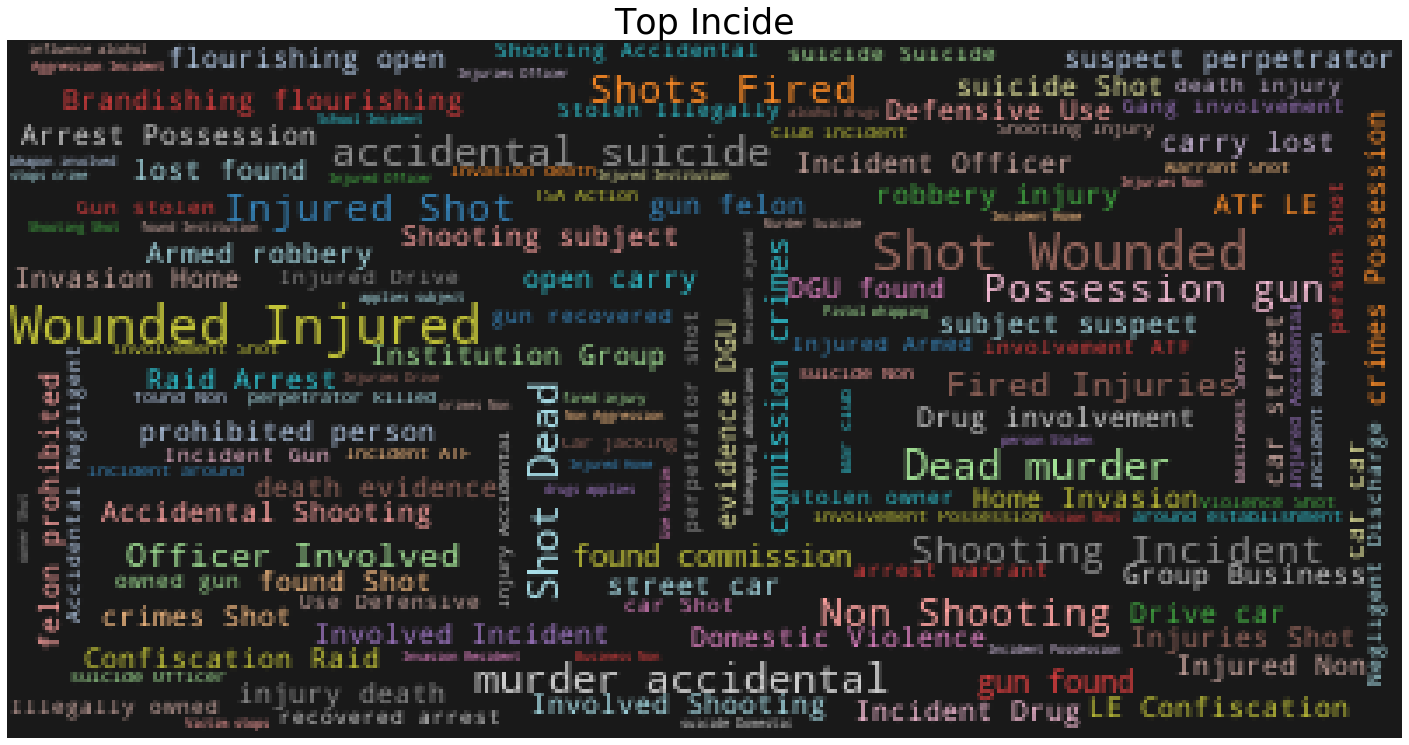

In [20]:
from wordcloud import WordCloud, STOPWORDS
import base64
import codecs

wc_col = [ u'Protestant',
       u'christianity_romancatholic', u'christianity_easternorthodox','uchristianity_protestant',
       u'christianity_romancatholic', u'christianity_anglican',  u'Christianity',
       u'judaism_orthodox', u'judaism_conservative', u'judaism_reform','Vaishnavism', 'Shaivism', 'Shaktism','Smartism'
       u'judaism_other', u'judaism_all', u'islam_sunni', u'islam_shia',
       u'islam_ibadhi', u'islam_NationOfIslam', u'islam_alawite',
       u'islam_ahmadiyya', u'islam_other', u'islam_all', u'buddhism_mahayana','mahayana',
       u'buddhism_theravada',  u'Buddhism', 
       u'Zoroastrianism', u'Hinduism', u'Sikhism', u'Shinto',
       u'baha’i', u'Taoism', u'Jainism', u'Confucianism', u'theravada',u'Dual_Religion'
       u'Syncretism', u'Animism', u'No_religion',
       u'Other_religion']
names = gun["incident_characteristics"][~pd.isnull(gun["incident_characteristics"])]
plt.figure(figsize=(25,21))
wc = WordCloud(background_color="black", max_words=10000, 
               stopwords=STOPWORDS, max_font_size= 15)
wc.generate(" ".join(names))
plt.imshow(wc.recolor( colormap= 'tab20' , random_state=17), alpha=0.9)
plt.title("Top Incide", fontsize=35)
plt.axis('off')
plt.show()

* **Top incidents :**
  * Shot
  * Wounded
  * Injured 
  * Dead, Murder, accidental
  * Possession, Fired etc.

## <a id='5-10'>5.10 Top Places inside the cities with highest number of Gun Violence</a>

In [21]:
temp = gun["location_description"].value_counts().head(20)
temp.iplot(kind='bar', xTitle = 'Place name', yTitle = "# of incidents", title = 'Top Places inside the cities with highest number of Gun Violence')

* **Top 5 Places inside the cities with highest number of Gun Violence :**
  * Walmart - 232 + 119 = 351 times
  *  McDonald's - 150 + 95 = 245 times
  * Austin - 240 times
  * 7-Eleven - 166 times
  * Motel 6 - 152 times

## <a id='5-11'>5.11 Time Series Analysis</a>

In [22]:
gun['total_peoples_infected'] = gun['n_killed'] + gun['n_injured']
cols_to_use = ['date','n_killed', 'n_injured', 'total_peoples_infected']
temp = gun[cols_to_use]
temp = temp.groupby('date').sum()
temp = temp.reset_index()

year2013_to_2017 = temp[temp.date.dt.year.isin([2013]) | temp.date.dt.year.isin([2014]) | temp.date.dt.year.isin([2015]) | temp.date.dt.year.isin([2016]) | temp.date.dt.year.isin([2017])].set_index('date')
year2018 = temp[temp.date.dt.year.isin([2018])].set_index('date')

temp = temp.reset_index()

temp['weekdays'] = temp['date'].dt.dayofweek
temp['month'] = temp['date'].dt.month 
temp['year'] = temp['date'].dt.year

dmap = {0:'Monday',1:'Tueday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
temp['weekdays'] = temp['weekdays'].map(dmap)

month_dict = {1 :"Jan",2 :"Feb",3 :"Mar",4 :"Apr",5 : "May",6 : "Jun",7 : "Jul",8 :"Aug",9 :"Sep",10 :"Oct",11 :"Nov",12 :"Dec"}
temp['month'] = temp['month'].map(month_dict)

del temp['date']

## <a id='5-11-1'>5.11.1 Week day wise Gun Violence incidents in USA</a>

In [23]:
temp1 = temp.groupby('weekdays').sum()
temp1 = temp1.reset_index()
temp1[['weekdays','n_killed','n_injured', 'total_peoples_infected']].set_index('weekdays').iplot(kind = 'bar', xTitle = 'Day of Week', yTitle = "# of people killed, injured and infected", title ="week day wise Gun Violence incidents in USA")

* **Top Week day  Gun Violence incidents in USA :**
  * **Sunday :**
    * No. of people killed - Approx. 10K 
    * No. of people injured - Approx. 22K
  * **Saturday :**
    * No. of people killed - Approx. 10K
    * No. of people injured - Approx. 21K

## <a id='5-11-2'>5.11.2 Month wise Gun Violence incidents in USA</a>

In [24]:
temp1 = temp.groupby('month').sum()
temp1 = temp1.reset_index()
temp1[['month','n_killed','n_injured', 'total_peoples_infected']].set_index('month').iplot(kind = 'bar', xTitle = 'Month', yTitle = "# of people killed, injured and infected", title ="Month wise Gun Violence incidents in USA")

* **Months having highest number of Guns Violence :**
  * **January :**
    * No. of people killed - 6035
    * No. of people injured - Approx. 11K
  * **July :**
    * No. of people killed - 5276
    * No. of people injured - Approx. 11K
  * **March :**
    * No. of people killed - 5641
    * No. of people injured - Approx. 10K

## <a id='5-11-3'>5.11.3 Year wise Gun Violence incidents in USA</a>

In [25]:
temp1 = temp.groupby('year').sum()
temp1 = temp1.reset_index()
temp1[['year','n_killed','n_injured', 'total_peoples_infected']].set_index('year').iplot(kind = 'bar', xTitle = 'Year', yTitle = "# of people killed, injured and infected", title ="Year wise Gun Violence incidents in USA")

* ** Year wise Gun violence graph look like vary dangerous. Every year Gun violence is increasing. From 2013 to 2017, total number of infected peoples increased from 1296 to Approx. 46K **

## <a id='5-11-4'>5.11.4 Trend of Gun Violence in USA</a>

In [26]:
year2013_to_2017.iplot(kind = 'scatter', xTitle='Year 2013 to Year 2017',  yTitle = "# of people killed, injured and infected", title ="Year 2013 to year 2017 Gun Violence incidents in USA")

In [27]:
year2018.iplot(kind = 'scatter', xTitle='Year 2018',  yTitle = "# of people killed, injured and infected", title ="Year 2018 Gun Violence incidents in USA")

* **Top 5 Gun Violence Dates in USA  from Jan, 2013 to March, 2018 :**
  * **July 5, 2014 :**
    * No. of people killed - 71
    * No. of people injured - 153
  * **July 5, 2015 :**
    * No. of people killed - 74
    * No. of people injured - 134
  * **Jan 1, 2018 :**
    * No. of people killed - 73
    * No. of people injured - 113
  * **Jan 1, 2015 :**
    * No. of people killed - 61
    * No. of people injured - 122
  * **Jan 1, 2015 :**
    * No. of people killed - 50
    * No. of people injured - 132
    
 ** * It's look like Highest of the incidents happened on Jan 1 and July 5.**

# <a id='6'>6. Brief Summary/Conclusions :</a>

* ** This is only a brief summary. If you want more details please go through my Notebook**

* **Top 5 states with highest number of Gun Violence in USA :**
  * Illinois - Approx. 18K
  * California - Approx. 16K
  * Florida - Approx. 15K
  * Texas - Approx. 14K
  * Ohio - Approx. 10K
* **Top 5 Cities with highest number of Gun Violence in USA :**
  * Chicago - Approx. 11K
  * Baltimore -  3943
  * Washington - 3279 
  * New Orleans - 3071
  * Philadelphia  - 2963
* **Number of Guns involved during Violence :**
  * 91 % time only 1 Gun was involved.
  * 5.33 % time only 2 Guns were involved.
  * 1.65 % time more than 4 Guns were involved.
  * 1.44 % time only 3 Guns were involved.
  * 0.62 % time only 4 Guns were involved.
* **Top 5 States where highest number of people killed and injured :**
  * **Killed :**
    * California - 5562
    * Texas - 5042
    * Florida - 3909
    * Illnois - 3409
    * Ohio - 2508
  * **Injured :**
    * Illnois - Approx. 14K
    * California - 7644
    * Florida - 7072
    * Texas - 6106 
    * Ohio - 5703
* **Top 5 Cities where highest number of people killed and injured :**
  * **Killed :**
    * Chicago - 2104
    * Houston - 1145
    * Baltimore - 1055
    * Saint Louis - 919
    * philadelphia - 901
  * **Injured :**
    * Chicago - Approx. 10K
    * Baltmore - 2427
    * Philadelphia - 2326
    * New Orleans - 1892
    * Saint Louis - 1783
* **Top 5 Cities where highest number of people killed and injured :**
  * **Killed :**
    * Chicago - 2104
    * Houston - 1145
    * Baltimore - 1055
    * Saint Louis - 919
    * philadelphia - 901
  * **Injured :**
    * Chicago - Approx. 10K
    * Baltmore - 2427
    * Philadelphia - 2326
    * New Orleans - 1892
    * Saint Louis - 1783
* Every Incident having More number of Males involved compared to Females.
* **Top 5 Guns used during Violence :**
  * Handgun -Approx. 25K times
  * 9mm - 6459 times
  * Rifle - 5270 times
  * Shotgun - 4270 times
  * 22 LR - 3355 times
* **Top 5 Guns who killed and injured highest number of peolpe :**
  * **Killed :**
    * Handgun - 3304 people killed
    * 9mm - 842 people killed
    * Rifle - 672 people killed
    * Shotgun - 660 people killed
    * 22 LR - 385 people killed
  * **Injured :**
    * Handgun - 5700 people injured
    * 9mm - 1240 people injured
    * Shotgun - 965 people injured
    * Rifle - 882 people injured
    * 40 SW - 702 people injured
* **Top incidents :**
  * Shot
  * Wounded
  * Injured 
  * Dead, Murder, accidental
  * Possession, Fired etc.
* **Top 5 Places inside the cities with highest number of Gun Violence :**
  * Walmart - 351 times
  *  McDonald's - 245 times
  * Austin - 240 times
  * 7-Eleven - 166 times
  * Motel 6 - 152 times
* **Top Week day  Gun Violence incidents in USA :**
  * **Sunday :**
    * No. of people killed - Approx. 10K 
    * No. of people injured - Approx. 22K
  * **Saturday :**
    * No. of people killed - Approx. 10K
    * No. of people injured - Approx. 21K
* **Months having highest number of Guns Violence :**
  * **January :**
    * No. of people killed - 6035
    * No. of people injured - Approx. 11K
  * **July :**
    * No. of people killed - 5276
    * No. of people injured - Approx. 11K
  * **March :**
    * No. of people killed - 5641
    * No. of people injured - Approx. 10K
* **Top 5 Gun Violence Dates in USA  from Jan, 2013 to March, 2018 :**
  * **July 5, 2014 :**
    * No. of people killed - 71
    * No. of people injured - 153
  * **July 5, 2015 :**
    * No. of people killed - 74
    * No. of people injured - 134
  * **Jan 1, 2018 :**
    * No. of people killed - 73
    * No. of people injured - 113
  * **Jan 1, 2015 :**
    * No. of people killed - 61
    * No. of people injured - 122
  * **Jan 1, 2015 :**
    * No. of people killed - 50
    * No. of people injured - 132
    
 ** * It's look like Highest of the incidents happened on Jan 1 and July 5.**
* ** Year wise Gun violence graph look like vary dangerous. Every year Gun violence is increasing. From 2013 to 2017, total number of infected peoples increased from 1296 to Approx. 46K **

# More To Come. Stayed Tuned !!